In [1]:
# Importing libraries
import pandas as pd
import re
import numpy as np
import zipfile


# graphs
import matplotlib.pyplot as plt
import seaborn as sns

# encoders, class analysers
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# data split
from sklearn.model_selection import train_test_split

# encoders, class analysers
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# models used
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor
from catboost import CatBoostRegressor
import xgboost as xgb

# hyperparameters search
from sklearn.model_selection import GridSearchCV

# metrics
from sklearn.metrics import mean_absolute_percentage_error


import warnings
import datetime as dt
# warnings.simplefilter('ignore')

In [2]:
# Functions used
def pie(column, lim=10):
    # the function takes in the string containing the name of
    # the column and displays a pie chart that inclues 10 most
    # common elements of the column
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.pie(x=df[column].value_counts()[:lim],
           labels=df[column].value_counts().index[:lim],
           autopct='%1.1f%%',
           labeldistance=1.2)
    ax.axis('equal')
    plt.show()


def numerical_histplot(column, hue=None):
    # the function takes in a string that is the
    # column and plots a histplot for it
    fig, ax = plt.subplots(figsize=(15, 10))
    sns.countplot(df[column], hue=hue)
    ax.set_title('Histplot for ' + column)
    plt.show()


def boxplot_numerical(column, target='price', sf=True):
    # the function takes in a string that is the
    # column and plots a boxblot depending on
    # the default flag
    fig, ax = plt.subplots(figsize=(10, 15))
    sns.boxplot(x=column,
                y=target,
                data=df,
                showfliers=sf)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + target + ' and ' + column)
    plt.show()


def clear_boxplot(column):
    # functions returns a boxplot for
    # visualisation of outliers and
    # numerical data distribution
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.boxplot(x=column,
                data=df)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


def percentile(column):
    # the function returns lower and upper
    # boundary of a column of numerical values
    global upper_boundary, lower_boundary
    Q1 = df[column].quantile(0.25)
    Q2 = df[column].quantile(0.50)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_boundary = Q3 + 1.5*IQR
    lower_boundary = Q1 - 1.5*IQR
    print('Lower boundary:', lower_boundary)
    print('Upper boundary:', upper_boundary)

In [4]:
zf = zipfile.ZipFile('test.zip') 
df = pd.read_csv(zf.open('test.csv'))

In [5]:
df

,bodyType,brand,car_url,color,complectation_dict,description,engineDisplacement,enginePower,equipment_dict,fuelType,...,vehicleConfiguration,vehicleTransmission,vendor,Владельцы,Владение,ПТС,Привод,Руль,Состояние,Таможня
0,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,синий,NaN,"Все автомобили, представленные в продаже, прох...",1.2 LTR,105 N12,"{""engine-proof"":true,""tinted-glass"":true,""airb...",бензин,...,LIFTBACK ROBOT 1.2,роботизированная,EUROPEAN,3 или более,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
1,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,чёрный,NaN,ЛОТ: 01217195\nАвтопрага Север\nДанный автомоб...,1.6 LTR,110 N12,"{""cruise-control"":true,""asr"":true,""esp"":true,""...",бензин,...,LIFTBACK MECHANICAL 1.6,механическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
2,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/superb/11...,серый,"{""id"":""20026336"",""name"":""Ambition"",""available_...","Все автомобили, представленные в продаже, прох...",1.8 LTR,152 N12,"{""cruise-control"":true,""tinted-glass"":true,""es...",бензин,...,LIFTBACK ROBOT 1.8,роботизированная,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
3,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,коричневый,"{""id"":""20803582"",""name"":""Ambition"",""available_...",КОМПЛЕКТ ЗИМНЕЙ (ЛЕТНЕЙ) РЕЗИНЫ ПО СЕЗОНУ В ПО...,1.6 LTR,110 N12,"{""cruise-control"":true,""roller-blind-for-rear-...",бензин,...,LIFTBACK AUTOMATIC 1.6,автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
4,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,белый,NaN,ЛОТ: 01220889\nАвтопрага Север\n\nВы можете по...,1.8 LTR,152 N12,"{""cruise-control"":true,""asr"":true,""esp"":true,""...",бензин,...,LIFTBACK AUTOMATIC 1.8,автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34681,седан,BMW,https://auto.ru/cars/used/sale/bmw/3er/1101369...,коричневый,NaN,Продается BMW 316i в отличном состоянии. Прода...,1.6 LTR,136 N12,"{""cruise-control"":true,""asr"":true,""tinted-glas...",бензин,...,SEDAN AUTOMATIC 1.6,автоматическая,EUROPEAN,3 или более,2 года и 1 месяц,Оригинал,задний,Левый,Не требует ремонта,Растаможен
34682,седан,BMW,https://auto.ru/cars/used/sale/bmw/5er/1101369...,чёрный,NaN,Продаётся отличный автомобиль.,2.0 LTR,190 N12,NaN,дизель,...,SEDAN AUTOMATIC 2.0,автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,полный,Левый,Не требует ремонта,Растаможен
34683,седан,BMW,https://auto.ru/cars/used/sale/bmw/5er/1101364...,серый,NaN,Хорошее состояние,2.5 LTR,170 N12,NaN,бензин,...,SEDAN AUTOMATIC 2.5,автоматическая,EUROPEAN,3 или более,NaN,Дубликат,задний,Левый,Не требует ремонта,Растаможен
34684,внедорожник 5 дв.,BMW,https://auto.ru/cars/used/sale/bmw/x1/11013625...,коричневый,"{""id"":""6336008"",""name"":""xDrive20d Локальная сб...",Автомобиль в идеальном состоянии . Куплен новы...,2.0 LTR,184 N12,"{""engine-proof"":true,""esp"":true,""start-stop-fu...",дизель,...,ALLROAD_5_DOORS AUTOMATIC 2.0,автоматическая,EUROPEAN,2 владельца,NaN,Оригинал,полный,Левый,Не требует ремонта,Растаможен


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34686 entries, 0 to 34685
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   bodyType              34686 non-null  object
 1   brand                 34686 non-null  object
 2   car_url               34686 non-null  object
 3   color                 34686 non-null  object
 4   complectation_dict    6418 non-null   object
 5   description           34686 non-null  object
 6   engineDisplacement    34686 non-null  object
 7   enginePower           34686 non-null  object
 8   equipment_dict        24690 non-null  object
 9   fuelType              34686 non-null  object
 10  image                 34686 non-null  object
 11  mileage               34686 non-null  int64 
 12  modelDate             34686 non-null  int64 
 13  model_info            34686 non-null  object
 14  model_name            34686 non-null  object
 15  name                  34686 non-null

In [7]:
for column in df.columns:
    print('number of unique values in', column, '-', len(df[column].unique()))

number of unique values in bodyType - 24
number of unique values in brand - 12
number of unique values in car_url - 34686
number of unique values in color - 16
number of unique values in complectation_dict - 2365
number of unique values in description - 31732
number of unique values in engineDisplacement - 55
number of unique values in enginePower - 315
number of unique values in equipment_dict - 23706
number of unique values in fuelType - 5
number of unique values in image - 34557
number of unique values in mileage - 11268
number of unique values in modelDate - 66
number of unique values in model_info - 954
number of unique values in model_name - 544
number of unique values in name - 2780
number of unique values in numberOfDoors - 5
number of unique values in parsing_unixtime - 34686
number of unique values in priceCurrency - 1
number of unique values in productionDate - 69
number of unique values in sell_id - 34686
number of unique values in super_gen - 5890
number of unique values i

From the first look, the data looks like a mess. Some of the columns have psudo-dictionaties in them, some columns have a lot of NaN values, the names of the columns are hard to interpret, some of the columns have namings in English, and some of them are in Russian, and the target value is not given(the price of the car). 

All of the issues above will need to be addressed one by one. 

# 1. Column namings.
1. bodyType - car body configuration, category. New name: carconfig;
2. brand - car brand, category. New name: brand;
3. car_url - url to the page of the car. All the values are unique, so it will not be used fot the model itself, yet the links might potentially have some useful information about the car. New name: car_url;
4. color - color of the car. Category. New name: colour;
5. complectation_dict - A string, that has dictionary in it. Need to be separated into multiple new columns or removed completely, since most of these values are empty. New name: complectation_dict;
6. description - description of the car. Rather lengthy, but potentially might contain some words that can be used for the model. What is curious, not all the values for this column are unique - there are 31732 unique values out of 34686, so approximately 8.5% of the values repeat the other ones. Will need to look into that. New name: description;
7. engineDisplacement - engine displacement in litres. Numerical. New name: engine_displacement;
8. enginePower - power of the engine in horsepowers. New name: power;
9. equipment_dict - a pseudo-dictionary with True/False values for different equipment for the car. Third of all the rows are missing this value, so most likely it will be dropped. 
10. fuelType - type of the fuel that the car uses. Category. New name: fuel_type;
11. image - image of the car. Most cars have unique pictures, but some of them do share it. Since Computer Vision is out of my reach as of now, most likely this column will also be deleted. New name: image;
12. mileage - the distance the car has travelled in km. Numerical. New name: mileage;
13. modelDate - the date when the model was released. This column can be interpreted as category or as a numerical column. For the first iteration, it shall be treated as a category. New name: model_date;
14. model_info - pseudo-dictionary with the information about the car model. Information inside the dictionary is not particulary useful(such as the name of the model in Russian, etc), so it might be dropped as well. New name: model_info;
15. model_name - name of the moel of the car. Category. New name: model_name;
16. name - some information regarding the engine. It is already represented in the other columns, so it will be dropped.
17. numberOfDoors - number of doors in the car. Numerical, but can be interpreted as a category. For the first iteration it will be treated as a numerical. New name: number_of_doors;
18. parsing_unixtime - time taken to parse the data(?). All values are unique, so it will be dropped. 
19. priceCurrency - all prices are given in Russian currency, so this column is irrelavent.
20. productionDate - date when the car was produced(?). As with modelDate, it will be treated as category. New name: production_date.
21. sell_id - all values are unique, discard the column.
22. super_gen - dictionary with information about the engine. It also has some info about the acceleration of the car, which might be extracted and used for the better prediction of the price. Need a closer look;
23. vehicleConfiguration - the column has the engine displacement value, body config and some other data mentioned in other columns. To be dropped.
24. vehicleTransmission - type of a transmission. New name: transmission;
25. vendor - vendor of the car. While techincally it is a normal category, in this data set it has only 2 unqiue values thus can be treated as binary(european and non-european). New name: vendor;
26. Владельцы - number of owners of the car. This is a category. New name: owners;
27. Владение - for how long the owner had the car. A lot of rows do not have this value, but for the first iteration it will be calculated using the difference between the current date and the prduction_date column, but most likely it will not be an efficient solution. Testing required. New name: age;
28. ПТС  -the column shows wheather a vehicle licence attached is an original one or a copy. Binary. New name: licence;
29. Привод - type of a drive unit of a car. Category. New name: drive_unit;
30. Руль - wheather the driving wheel is to the left or to the right side of the car. Shall be treated as a binary. New name: wheel;
31. Состояние - Only one value present, to be dropped;
32. Таможня - Only one value present, to be dropped;

In [8]:
# To see the date when the data was parced
df.parsing_unixtime.unique()

array([1603226273, 1603226277, 1603226280, ..., 1603707843, 1603707909,
       1603710264], dtype=int64)

After converting it into a readable format, it is clear that the data was parced around late October 2020. Exchange rateof dollar to ruble was:

In [9]:
old_rate = 76.92
new_rate = 72.18

In [10]:
# Dropping some of the columns to clear the dataset
df = df.drop(['car_url', 'complectation_dict',
              'equipment_dict', 'image',
              'model_info',
              'parsing_unixtime', 'priceCurrency',
              'vehicleConfiguration',
              'Состояние', 'Таможня'], axis=1)
df.columns = ['carconfig', 'brand', 'colour', 'description',
              'engine_displacement', 'power', 'fuel_type',
              'mileage', 'model_date', 'model_name', 'name',
              'number_of_doors', 'production_date', 'sell_id',
              'super_gen', 'transmission', 'vendor',
              'owners', 'age', 'licence',
              'drive_unit', 'wheel']

df['test'] = 1
df.head()

,carconfig,brand,colour,description,engine_displacement,power,fuel_type,mileage,model_date,model_name,...,sell_id,super_gen,transmission,vendor,owners,age,licence,drive_unit,wheel,test
0,лифтбек,SKODA,синий,"Все автомобили, представленные в продаже, прох...",1.2 LTR,105 N12,бензин,74000,2013,OCTAVIA,...,1100575026,"{""id"":""10373605"",""displacement"":1197,""engine_t...",роботизированная,EUROPEAN,3 или более,NaN,Оригинал,передний,Левый,1
1,лифтбек,SKODA,чёрный,ЛОТ: 01217195\nАвтопрага Север\nДанный автомоб...,1.6 LTR,110 N12,бензин,60563,2017,OCTAVIA,...,1100549428,"{""id"":""20913311"",""displacement"":1598,""engine_t...",механическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,1
2,лифтбек,SKODA,серый,"Все автомобили, представленные в продаже, прох...",1.8 LTR,152 N12,бензин,88000,2013,SUPERB,...,1100658222,"{""id"":""20026323"",""nameplate"":""DSG"",""displaceme...",роботизированная,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,1
3,лифтбек,SKODA,коричневый,КОМПЛЕКТ ЗИМНЕЙ (ЛЕТНЕЙ) РЕЗИНЫ ПО СЕЗОНУ В ПО...,1.6 LTR,110 N12,бензин,95000,2013,OCTAVIA,...,1100937408,"{""id"":""20105521"",""displacement"":1598,""engine_t...",автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,1
4,лифтбек,SKODA,белый,ЛОТ: 01220889\nАвтопрага Север\n\nВы можете по...,1.8 LTR,152 N12,бензин,58536,2008,OCTAVIA,...,1101037972,"{""id"":""4561004"",""displacement"":1798,""engine_ty...",автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,1


Since the train data frame had a few edits before it was uploaded, certain changes need to be done to the validation dataframe. 
Certain columns need to be turned into integers, and the engine displacement data for electric cars need to be filled.
While doing this, the data for engine displacement was left as a category, since the units of the displacement for non-electric and electric cars are different and the nu,erical values lay in a different level of magnitude. The model will be tested only with numerical logged values, but the baseline wil treat it as a category. 

In [11]:
def fill_electric_ed(name):
    pattern = '\d+'
    engine_displacement_value = str(re.findall(pattern, name)[-1])+' kW'
    return engine_displacement_value

In [12]:
electric = df[df.fuel_type == 'электро'].index
df.loc[electric, 'engine_displacement'] = df.iloc[electric
].name.apply(fill_electric_ed)
df = df.drop('name', axis=1)

In [13]:
df.power = df.power.apply(lambda x: int(x.replace(' N12', '')))
# df.engine_displacement = df.engine_displacement.apply(
# lambda x : float(x.replace(' LTR', '')))

In [14]:
df.head()

,carconfig,brand,colour,description,engine_displacement,power,fuel_type,mileage,model_date,model_name,...,sell_id,super_gen,transmission,vendor,owners,age,licence,drive_unit,wheel,test
0,лифтбек,SKODA,синий,"Все автомобили, представленные в продаже, прох...",1.2 LTR,105,бензин,74000,2013,OCTAVIA,...,1100575026,"{""id"":""10373605"",""displacement"":1197,""engine_t...",роботизированная,EUROPEAN,3 или более,NaN,Оригинал,передний,Левый,1
1,лифтбек,SKODA,чёрный,ЛОТ: 01217195\nАвтопрага Север\nДанный автомоб...,1.6 LTR,110,бензин,60563,2017,OCTAVIA,...,1100549428,"{""id"":""20913311"",""displacement"":1598,""engine_t...",механическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,1
2,лифтбек,SKODA,серый,"Все автомобили, представленные в продаже, прох...",1.8 LTR,152,бензин,88000,2013,SUPERB,...,1100658222,"{""id"":""20026323"",""nameplate"":""DSG"",""displaceme...",роботизированная,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,1
3,лифтбек,SKODA,коричневый,КОМПЛЕКТ ЗИМНЕЙ (ЛЕТНЕЙ) РЕЗИНЫ ПО СЕЗОНУ В ПО...,1.6 LTR,110,бензин,95000,2013,OCTAVIA,...,1100937408,"{""id"":""20105521"",""displacement"":1598,""engine_t...",автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,1
4,лифтбек,SKODA,белый,ЛОТ: 01220889\nАвтопрага Север\n\nВы можете по...,1.8 LTR,152,бензин,58536,2008,OCTAVIA,...,1101037972,"{""id"":""4561004"",""displacement"":1798,""engine_ty...",автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,1


# Translation
A lot of categorical columns are in Russian. For the sake of making data more homogeneous, most of them will be translated. Translation will take place after merging the train and test data frames.

In [15]:
car_types = {'лифтбек': 'liftback',
             'внедорожник 5 дв.': 'SUV',
             'хэтчбек 5 дв.': 'hatchback',
             'седан': 'sedan',
             'компактвэн': 'compact van',
             'универсал 5 дв.': 'universal',
             'пикап одинарная кабина': 'regular pickup',
             'хэтчбек 3 дв.': 'hatchback',
             'купе': 'coupe',
             'кабриолет': 'cabriolet',
             'минивэн': 'mini van',
             'пикап двойная кабина': 'double pickup',
             'внедорожник 3 дв.': 'SUV',
             'родстер': 'roadster',
             'микровэн': 'micro van',
             'седан 2 дв.': 'sedan',
             'купе-хардтоп': 'coupe hardtop',
             'фастбек': 'fastback',
             'тарга': 'targa',
             'внедорожник открытый': 'open SUV',
             'лимузин': 'limo',
             'пикап полуторная кабина': 'extended pickup',
             'седан-хардтоп': 'sedan hardtop',
             'фургон': 'van'}

colours = {'синий': 'blue',
           'чёрный': 'black',
           'серый': 'grey',
           'коричневый': 'brown',
           'белый': 'white',
           'пурпурный': 'magenta',
           'бежевый': 'beige',
           'серебристый': 'silver',
           'красный': 'red',
           'зелёный': 'green',
           'жёлтый': 'yellow',
           'голубой': 'light blue',
           'оранжевый': 'orange',
           'фиолетовый': 'purple',
           'золотистый': 'golden',
           'розовый': 'pink'}

transmission = {'роботизированная': 'robotic',
                'механическая': 'mechanical',
                'автоматическая': 'automatic',
                'вариатор': 'variable'}

drive_unit = {'передний': 'front',
              'полный': 'four',
              'задний': 'rear'}

fuel = {'бензин': 'petrol',
        'дизель': 'diesel',
        'гибрид': 'hybrid',
        'электро': 'electric',
        'газ': 'gas'}

steering_wheels = {'Левый': 0,
                   'Правый': 1}

licences = {'Оригинал': 1,
            'Дубликат': 0}

vendors = {'EUROPEAN': 1,
           'JAPANESE': 0}

owners = {'3 или более': 2,
          '1\xa0владелец': 1,
          '2\xa0владельца': 0}

# Training import
Importing training data frame and merging it with the testing one.

In [16]:
df_train_1 = pd.read_csv('train_1.csv').drop('Unnamed: 0', axis=1)
df_train_2 = pd.read_csv('train_2.csv').drop('Unnamed: 0', axis=1)
df_train_3 = pd.read_csv('train_3.csv').drop('Unnamed: 0', axis=1)
df_train_4 = pd.read_csv('train_4.csv').drop('Unnamed: 0', axis=1)
df_train = pd.concat([df_train_1,
                      df_train_2,
                      df_train_3,
                      df_train_4]
                    ).reset_index(
).drop('index', axis=1)
display(df_train.head())
np.shape(df_train)

,production_date,mileage,model_date,carconfig,colour,transmission,drive_unit,wheel,owners,licence,brand,model_name,age,engine_displacement,power,fuel_type,number_of_doors,price,test
0,2018,4000,XIII 2014 – 2018,пикап двойная кабина,чёрный,автоматическая,полный,Левый,2 владельца,Оригинал,Ford,F-150,NaN,3.5 LTR,450,Бензин,4,7750000,0
1,2016,84800,II 2016 – 2020,хэтчбек 5 дв.,серебристый,роботизированная,полный,Левый,3 или более,Оригинал,Porsche,Panamera,NaN,2.9 LTR,440,Бензин,5,6790000,0
2,2017,48000,I Рестайлинг 2015 – 2017,внедорожник 5 дв.,белый,автоматическая,полный,Левый,1 владелец,Оригинал,Mazda,CX-5,4 года и 1 месяц,2.0 LTR,150,Бензин,5,1950000,0
3,2018,53015,I 2017 – н.в.,седан,белый,автоматическая,полный,Левый,2 владельца,Оригинал,Genesis,G70,NaN,2.0 LTR,197,Бензин,4,1742000,0
4,2017,92000,2015 – 2020,универсал 5 дв.,серый,роботизированная,передний,Левый,1 владелец,Оригинал,Renault,Talisman,NaN,1.6 LTR,160,Дизель,5,1360000,0


(19274, 19)

In [17]:
df_train = df_train.drop_duplicates()

In [18]:
df = pd.concat([df, df_train]).reset_index(
).drop('index', axis=1)
display(df.head())
np.shape(df)

,carconfig,brand,colour,description,engine_displacement,power,fuel_type,mileage,model_date,model_name,...,super_gen,transmission,vendor,owners,age,licence,drive_unit,wheel,test,price
0,лифтбек,SKODA,синий,"Все автомобили, представленные в продаже, прох...",1.2 LTR,105,бензин,74000,2013,OCTAVIA,...,"{""id"":""10373605"",""displacement"":1197,""engine_t...",роботизированная,EUROPEAN,3 или более,NaN,Оригинал,передний,Левый,1,NaN
1,лифтбек,SKODA,чёрный,ЛОТ: 01217195\nАвтопрага Север\nДанный автомоб...,1.6 LTR,110,бензин,60563,2017,OCTAVIA,...,"{""id"":""20913311"",""displacement"":1598,""engine_t...",механическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,1,NaN
2,лифтбек,SKODA,серый,"Все автомобили, представленные в продаже, прох...",1.8 LTR,152,бензин,88000,2013,SUPERB,...,"{""id"":""20026323"",""nameplate"":""DSG"",""displaceme...",роботизированная,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,1,NaN
3,лифтбек,SKODA,коричневый,КОМПЛЕКТ ЗИМНЕЙ (ЛЕТНЕЙ) РЕЗИНЫ ПО СЕЗОНУ В ПО...,1.6 LTR,110,бензин,95000,2013,OCTAVIA,...,"{""id"":""20105521"",""displacement"":1598,""engine_t...",автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,1,NaN
4,лифтбек,SKODA,белый,ЛОТ: 01220889\nАвтопрага Север\n\nВы можете по...,1.8 LTR,152,бензин,58536,2008,OCTAVIA,...,"{""id"":""4561004"",""displacement"":1798,""engine_ty...",автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,1,NaN


(44466, 23)

In [19]:
# As of now the train df does not have description
# or super_gen, they are dropped for now
df = df.drop(['description', 'super_gen'], axis=1)

# 2. Individual Columns.

## Target value - price
Since the car offers in test dataset are from 2020, and the car data from trai data set is from 2021, the exchange rate of ruble to dollar has changed over the year, so the modern prices will need to be converted into the 2020 ones.

In [20]:
# conversion
df.loc[~df.price.isna(), 'price'] = df.loc[~df.price.isna(),
                                           'price'].apply(
    lambda x: (x/new_rate)*old_rate
)

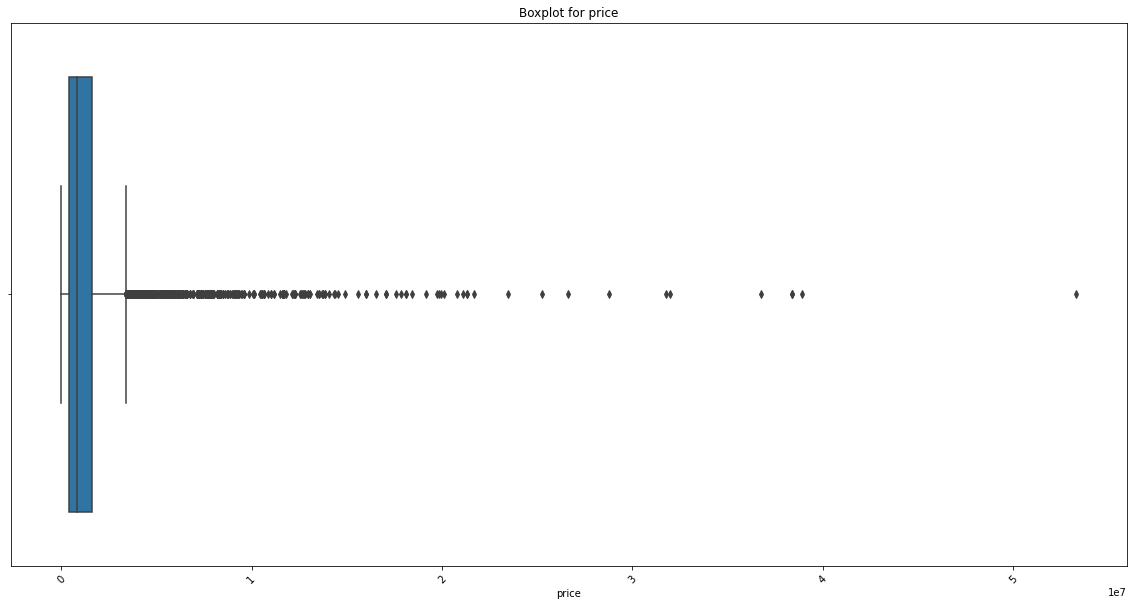

In [21]:
clear_boxplot('price')

C:\Users\d\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

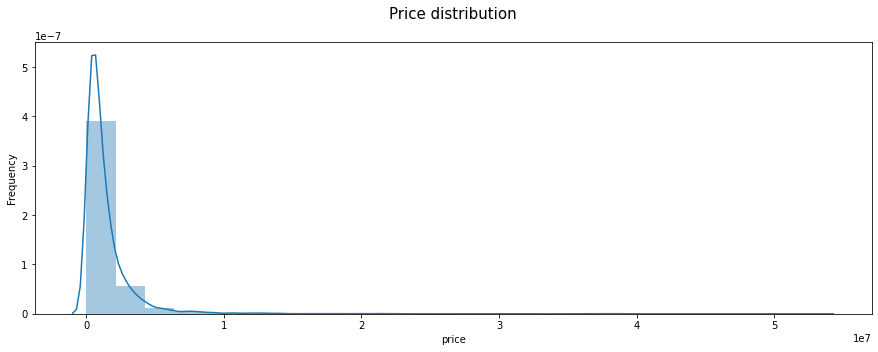

In [22]:
plt.figure(figsize=(15, 5))
sns.distplot(df.price.values, bins=25)
plt.title('Price distribution\n', fontsize=15)
plt.xlabel('price')
plt.ylabel('Frequency')

The data is spread with a strong left hand side tail. While the data has a lot of outliers, none of them will be dropped, since some vitage cars might be very expensive, and some premium cars can be extreely expensive compared to the average cars. To reduce the spread of data, a log of the price will be taken.

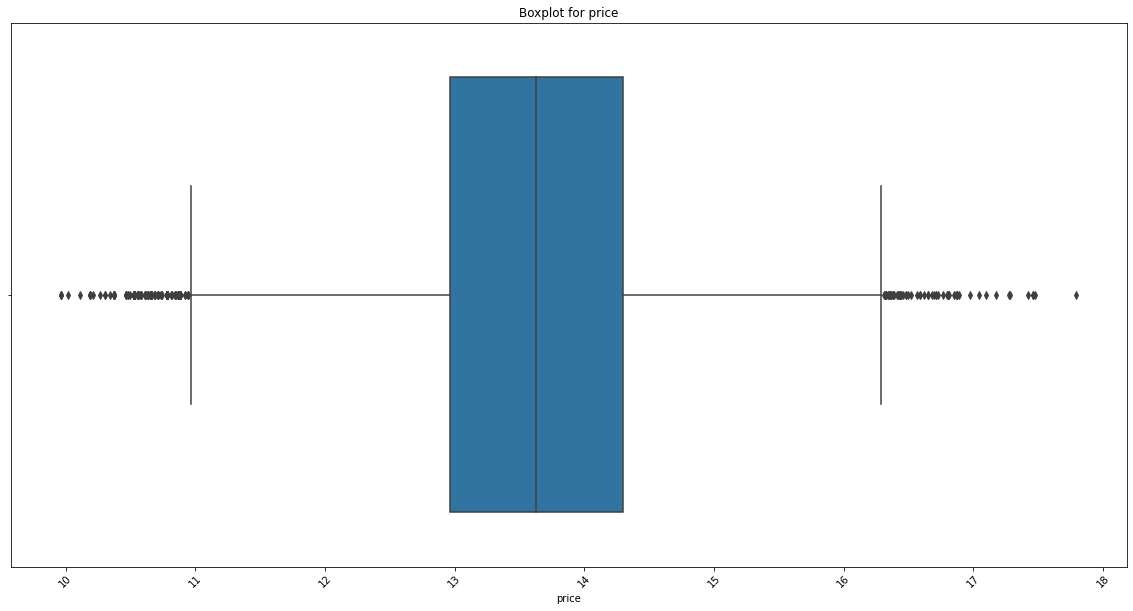

In [23]:
df.price = df.price.apply(lambda x: np.log(x))
clear_boxplot('price')

C:\Users\d\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

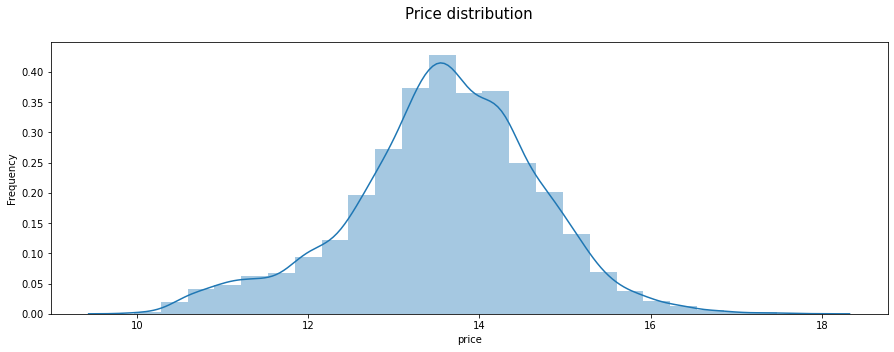

In [24]:
plt.figure(figsize=(15, 5))
sns.distplot(df.price.values, bins=25)
plt.title('Price distribution\n', fontsize=15)
plt.xlabel('price')
plt.ylabel('Frequency')

In [25]:
percentile('price')

Lower boundary: 10.955050488819072
Upper boundary: 16.30243483164271


Taking a log value of a price has shifted distribution to a normal one. There are a few outliers, yet they will not be removed, since some cars might be very expensive retro-cars or very expensive cars for people with high income.

## Car configuration
Some car types hold a number of doors in their car configuration. This value can also be found in the column number_of_doors, so the carconfig can be generalised.

In [26]:
df.loc[df.test==1].carconfig.unique()

array(['лифтбек', 'внедорожник 5 дв.', 'хэтчбек 5 дв.', 'седан',
       'компактвэн', 'универсал 5 дв.', 'пикап одинарная кабина',
       'хэтчбек 3 дв.', 'купе', 'кабриолет', 'минивэн',
       'пикап двойная кабина', 'внедорожник 3 дв.', 'родстер', 'микровэн',
       'седан 2 дв.', 'купе-хардтоп', 'фастбек', 'тарга',
       'внедорожник открытый', 'лимузин', 'пикап полуторная кабина',
       'седан-хардтоп', 'фургон'], dtype=object)

In [27]:
# translaing the column
df.carconfig = df.carconfig.map(car_types)

In [28]:
df.loc[df.test==1].carconfig.unique()

array(['liftback', 'SUV', 'hatchback', 'sedan', 'compact van',
       'universal', 'regular pickup', 'coupe', 'cabriolet', 'mini van',
       'double pickup', 'roadster', 'micro van', 'coupe hardtop',
       'fastback', 'targa', 'open SUV', 'limo', 'extended pickup',
       'sedan hardtop', 'van'], dtype=object)

In [29]:
car_types

{'лифтбек': 'liftback',
 'внедорожник 5 дв.': 'SUV',
 'хэтчбек 5 дв.': 'hatchback',
 'седан': 'sedan',
 'компактвэн': 'compact van',
 'универсал 5 дв.': 'universal',
 'пикап одинарная кабина': 'regular pickup',
 'хэтчбек 3 дв.': 'hatchback',
 'купе': 'coupe',
 'кабриолет': 'cabriolet',
 'минивэн': 'mini van',
 'пикап двойная кабина': 'double pickup',
 'внедорожник 3 дв.': 'SUV',
 'родстер': 'roadster',
 'микровэн': 'micro van',
 'седан 2 дв.': 'sedan',
 'купе-хардтоп': 'coupe hardtop',
 'фастбек': 'fastback',
 'тарга': 'targa',
 'внедорожник открытый': 'open SUV',
 'лимузин': 'limo',
 'пикап полуторная кабина': 'extended pickup',
 'седан-хардтоп': 'sedan hardtop',
 'фургон': 'van'}

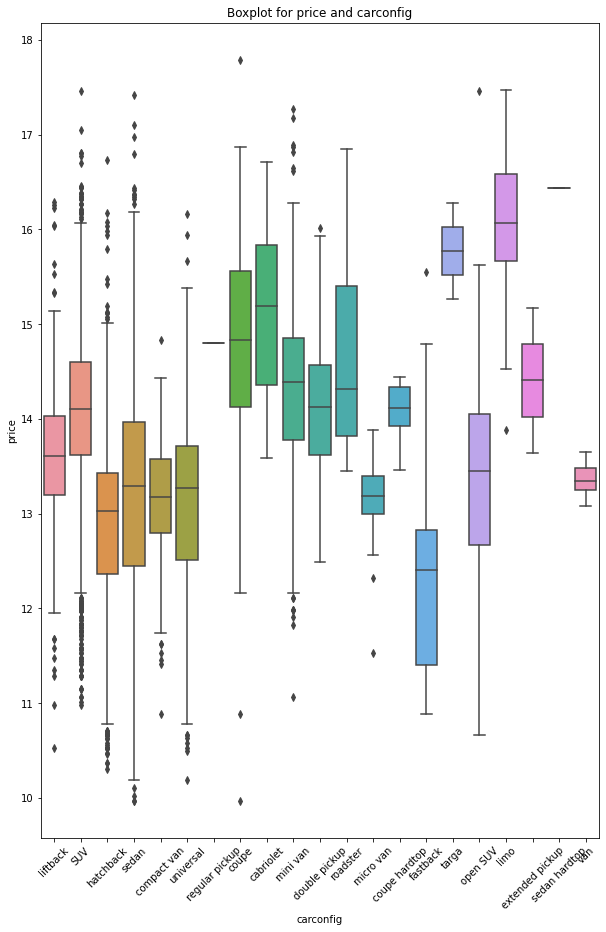

In [30]:
boxplot_numerical('carconfig', 'price')

Because the data is too small, the price for some car types is not very representative. The most expensive car type appears to be limo. It has the highest median as well as highest upper boundary. Hathback has the lowest lower boundary, yet the compact van has the lowest median.
Sedan Hardtop has the highest median, but because of the small sample size it is not very representative.

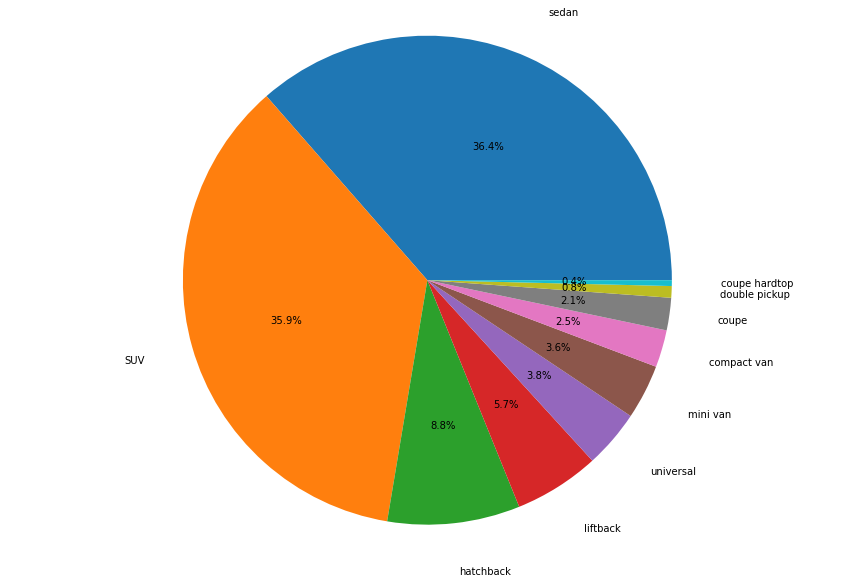

sedan              16022
SUV                15802
hatchback           3852
liftback            2488
universal           1689
mini van            1590
compact van         1084
coupe                943
double pickup        337
coupe hardtop        168
cabriolet            114
roadster             114
van                  110
open SUV              53
limo                  23
micro van             22
fastback              20
sedan hardtop         13
extended pickup        7
regular pickup         6
NaN                    5
targa                  4
Name: carconfig, dtype: int64

sedan              0.360361
SUV                0.355413
hatchback          0.086638
liftback           0.055959
universal          0.037988
mini van           0.035762
compact van        0.024381
coupe              0.021210
double pickup      0.007580
coupe hardtop      0.003779
cabriolet          0.002564
roadster           0.002564
van                0.002474
open SUV           0.001192
limo               0.000517
micro van          0.000495
fastback           0.000450
sedan hardtop      0.000292
extended pickup    0.000157
regular pickup     0.000135
targa              0.000090
Name: carconfig, dtype: float64

In [31]:
pie('carconfig')
display(df.carconfig.value_counts(dropna=False))
display(df.carconfig.value_counts(normalize=True))

Sedan and SUV type cars are the most common, taking up the majority of the cars in the dataset. Msot car types appear to be very specific/rare configurations. 

In [32]:
df = df.loc[~df.carconfig.isna()]

## colour

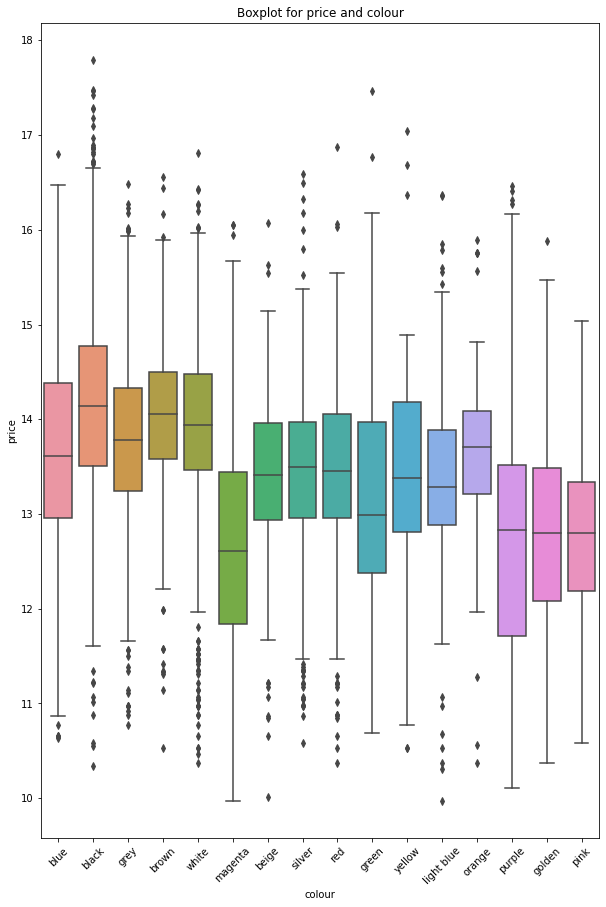

In [33]:
# translaing the column
df.colour = df.colour.map(colours)
boxplot_numerical('colour', 'price')

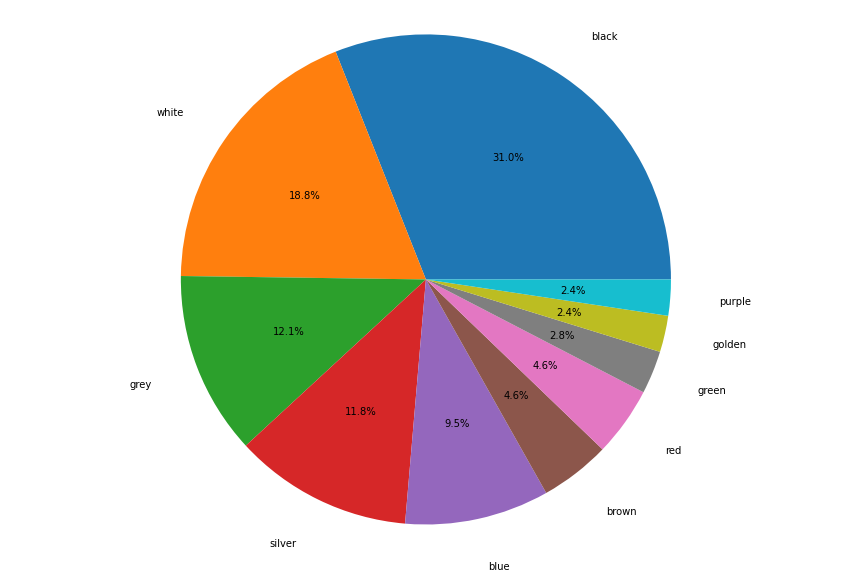

black         12914
white          7819
grey           5034
silver         4907
blue           3967
brown          1933
red            1907
green          1183
golden         1000
purple          988
magenta         900
beige           838
light blue      581
yellow          227
orange          185
pink             78
Name: colour, dtype: int64

black         0.290457
white         0.175862
grey          0.113223
silver        0.110366
blue          0.089224
brown         0.043476
red           0.042892
green         0.026608
golden        0.022492
purple        0.022222
magenta       0.020242
beige         0.018848
light blue    0.013068
yellow        0.005106
orange        0.004161
pink          0.001754
Name: colour, dtype: float64

In [34]:
pie('colour')
display(df.colour.value_counts())
display(df.colour.value_counts(normalize=True))

It appears that almost no one likes pink cars. Black and white cars make up a majority of the cars. Apparently certain colours have higher median for car prices. On average, brown and white cars are the most expensive ones, yet yellow cars seem to have the highest upper boudary. Magenta cars seem to be cheaper than the rest by a stretch. Green car prices seem to have the highest spread, which is definitely not caused by the big sample group - green cars make up only 2.6% of all the cars. 

## Brand
Not all the car brands are presented in the validation dataset, so all the other brands that are not included need to be dropped.

In [35]:
df.brand = df.brand.apply(lambda x: x.strip().lower())
df.loc[df.test==0].brand.unique()

array(['ford', 'porsche', 'mazda', 'genesis', 'renault', 'mercedes-benz',
       'nissan', 'lamborghini', 'suzuki', 'toyota', 'chevrolet',
       'volkswagen', 'hyundai', 'land rover', 'rolls-royce', 'bmw',
       'volvo', 'kia', 'audi', 'honda', 'citroen', 'haval', 'lexus',
       'jeep', 'skoda', 'infiniti', 'mitsubishi', 'lada (ваз)', 'газ',
       'mini', 'ferrari', 'dodge', 'opel', 'bentley', 'ram', 'jaguar',
       'maserati', 'great wall', 'hummer', 'cadillac', 'geely', 'ac',
       'уаз', 'subaru', 'gmc', 'lifan', 'faw', 'daewoo', 'peugeot',
       'seat', 'иж', 'chery', 'fiat', 'тагаз', 'chrysler', 'ssangyong',
       'vortex', 'alfa romeo', 'lincoln', 'scion', 'acura', 'daihatsu',
       'зис', 'зил', 'jinbei', 'plymouth', 'заз', 'buick', 'pontiac',
       'lancia', 'maybach', 'byd', 'москвич', 'smart', 'zotye', 'asia',
       'ravon', 'cheryexeed', 'hafei', 'ds', 'dongfeng', 'aston martin',
       'jac', 'rover', 'willys', 'wanderer', 'hudson', 'adler', 'hanomag',
       'bo

In [36]:
# Mercedes brand is shortened in the test dataset,
# so it needs to be shortened in train as well
df.brand = df.brand.apply(lambda x: x.replace('-benz', ''))

In [37]:
df.brand = df.brand.apply(lambda x: x.strip().lower())
prediction_brands = df.loc[df.test == 1].brand.unique()
df = df[df.brand.isin(prediction_brands)].reset_index(
).drop('index', axis=1)

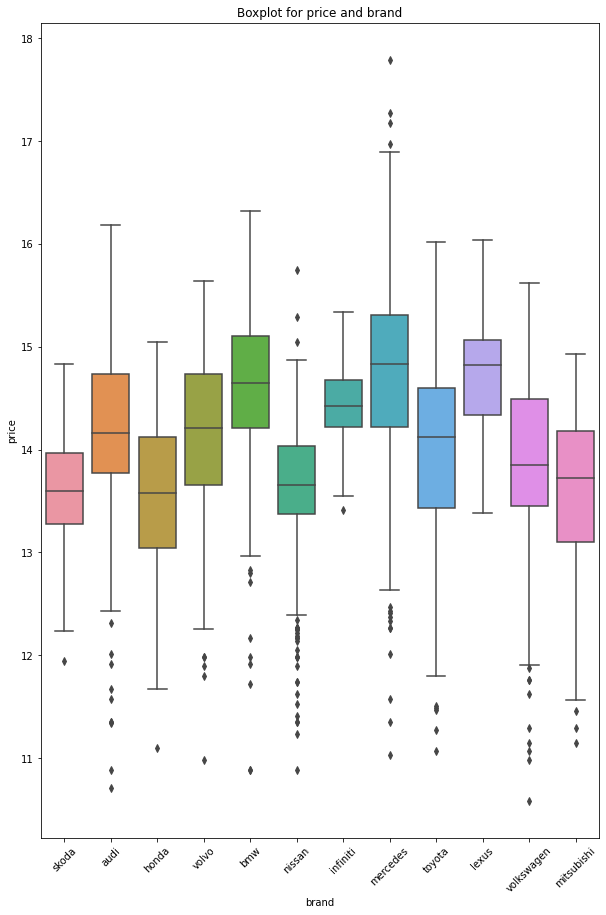

In [38]:
boxplot_numerical('brand', 'price')

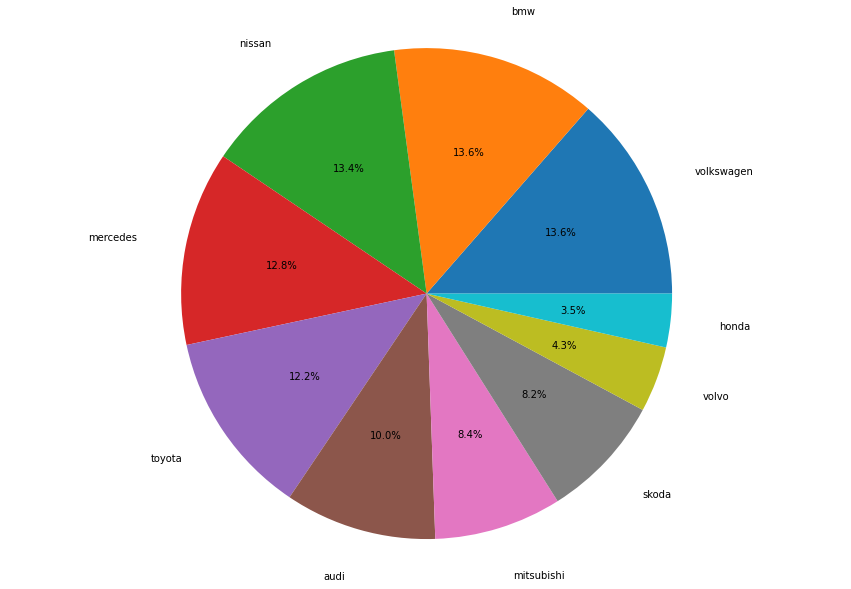

volkswagen    4999
bmw           4995
nissan        4951
mercedes      4720
toyota        4501
audi          3682
mitsubishi    3095
skoda         3014
volvo         1597
honda         1300
lexus          951
infiniti       941
Name: brand, dtype: int64

volkswagen    0.129020
bmw           0.128917
nissan        0.127781
mercedes      0.121819
toyota        0.116167
audi          0.095029
mitsubishi    0.079879
skoda         0.077789
volvo         0.041217
honda         0.033552
lexus         0.024544
infiniti      0.024286
Name: brand, dtype: float64

In [39]:
pie('brand')
display(df.brand.value_counts())
display(df.brand.value_counts(normalize=True))

Mercedes is the most expensive brand both by median and by uppear boundary, but it also has a one of the largest spreads. Overall, BMV, Volkswagen, Nissan, Mercedes and Toyota make up around the same percentage of total cars(11-12%). Skoda seems to have one of the lowest medians. 

## Fuel type

In [40]:
df.fuel_type = df.fuel_type.apply(lambda x: x.strip().lower())
prediction_fuels = df.loc[df.test == 1].fuel_type.unique()
df = df[df.fuel_type.isin(prediction_fuels)].reset_index(
).drop('index', axis=1)

In [41]:
# translaing the column
df.fuel_type = df.fuel_type.map(fuel)

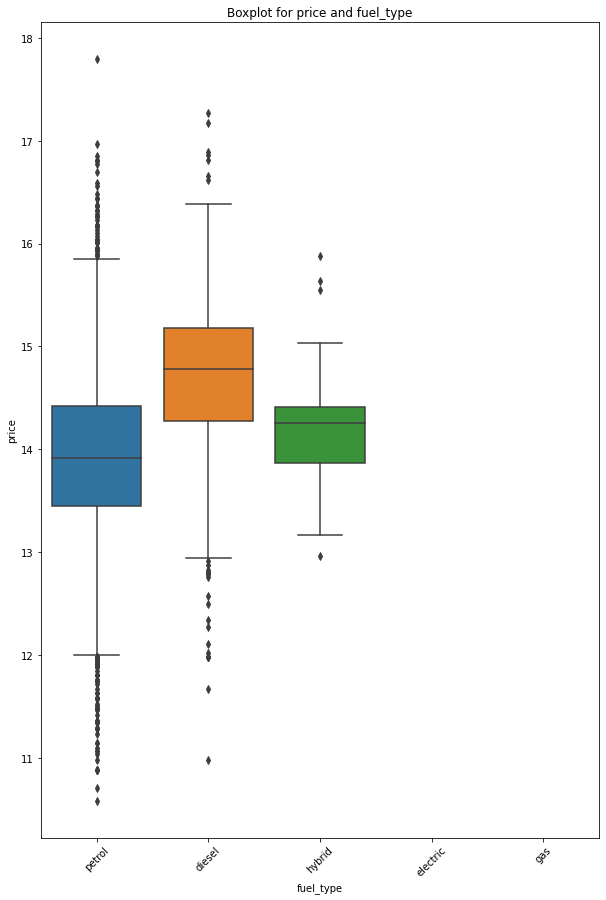

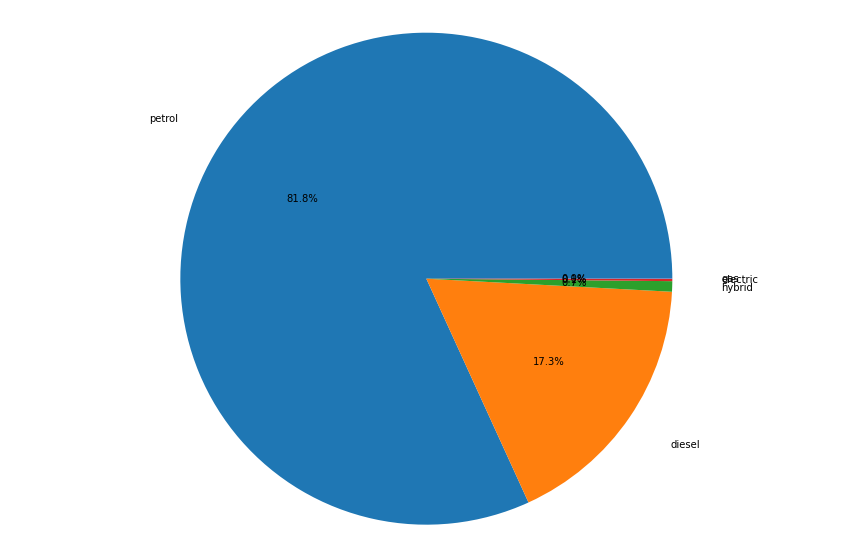

petrol      31686
diesel       6714
hybrid        266
electric       55
gas             7
Name: fuel_type, dtype: int64

petrol      0.818168
diesel      0.173363
hybrid      0.006868
electric    0.001420
gas         0.000181
Name: fuel_type, dtype: float64

In [42]:
boxplot_numerical('fuel_type', 'price')
pie('fuel_type')
display(df.fuel_type.value_counts())
display(df.fuel_type.value_counts(normalize=True))

As can be 

## Engine Displacement

In [43]:
df.engine_displacement.unique()

array(['1.2 LTR', '1.6 LTR', '1.8 LTR', '2.0 LTR', '1.4 LTR', '1.3 LTR',
       '1.0 LTR', '3.6 LTR', '1.5 LTR', '1.9 LTR', '2.8 LTR', '1.1 LTR',
       '2.5 LTR', '4.2 LTR', '3.0 LTR', '4.0 LTR', '5.9 LTR', '2.7 LTR',
       '3.1 LTR', '2.4 LTR', '5.2 LTR', '3.2 LTR', '4.1 LTR', '6.3 LTR',
       '2.3 LTR', '6.0 LTR', '2.2 LTR', '3.7 LTR', '2.9 LTR', '5.0 LTR',
       '3.3 LTR', '2.1 LTR', '2.6 LTR', '4 kW', '3.5 LTR', '1.7 LTR',
       '0.7 LTR', '4.4 LTR', '4.8 LTR', '5.4 LTR', '6.6 LTR', '126 kW',
       '4.9 LTR', '3.8 LTR', '3.4 LTR', '3.9 LTR', '4.6 LTR', '5.6 LTR',
       '81 kW', '111 kW', '4.5 LTR', '5.5 LTR', '6.2 LTR', '4.7 LTR',
       '4.3 LTR', '5.8 LTR', '5.3 LTR', '5.7 LTR', '85 kW', '50 kW',
       '132 kW', '2.3 LTR ', '3.8 LTR ', '5.5 LTR ', '2.4 LTR ',
       '2.0 LTR ', '1.6 LTR ', '3.5 LTR ', '1.5 LTR ', '4.0 LTR ',
       '3.0 LTR ', '1.4 LTR ', '5.6 LTR ', '4.4 LTR ', '4.6 LTR ',
       '5.0 LTR ', '4.7 LTR ', '2.5 LTR ', '2.7 LTR ', '4.5 LTR ',
       '1.8 LTR

In [44]:
df.loc[df['fuel_type'] == 'electric', 'engine_displacement'] = df.loc[
    df['fuel_type'] == 'electric', 'engine_displacement'
].apply(lambda x: int(x.replace(' kW', ''))) 

In [45]:
df.loc[~(df['fuel_type'] == 'electric'), 'engine_displacement'] = df.loc[
    ~(df['fuel_type'] == 'electric'), 'engine_displacement'
].apply(lambda x: float(x.replace(' LTR', '')))

In [164]:
df.loc[
    df.fuel_type == 'electric', 'engine_displacement'
    ]/df.loc[df.fuel_type == 'electric', 'power']

C:\Users\d\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Series([], dtype: float64)

Electric cars do not have engine displacement, and the value of Watts just holds the value of the power of the engine in different units. Obly one value has a different ratio, but it is irrelevent. All the values for engine displacement for electric cars will be replaced by 0.

In [47]:
df.loc[df.fuel_type == 'electric']

,carconfig,brand,colour,engine_displacement,power,fuel_type,mileage,model_date,model_name,number_of_doors,...,sell_id,transmission,vendor,owners,age,licence,drive_unit,wheel,test,price
5241,SUV,audi,white,4,408,electric,885,2018,E_TRON,5,...,1.101083e+09,автоматическая,EUROPEAN,1 владелец,1 год и 3 месяца,Оригинал,полный,Левый,1,NaN
7992,hatchback,bmw,blue,126,170,electric,32000,2017,I3,5,...,1.101043e+09,автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,задний,Левый,1,NaN
8252,hatchback,bmw,grey,126,170,electric,51000,2013,I3,5,...,1.101278e+09,автоматическая,EUROPEAN,1 владелец,1 месяц,Оригинал,задний,Левый,1,NaN
8350,hatchback,bmw,white,126,170,electric,25000,2017,I3,5,...,1.100272e+09,автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,задний,Левый,1,NaN
8684,hatchback,bmw,black,126,170,electric,58500,2013,I3,5,...,1.101175e+09,автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,задний,Левый,1,NaN
8722,hatchback,bmw,light blue,126,170,electric,28800,2013,I3,5,...,1.100097e+09,автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,задний,Левый,1,NaN
8917,hatchback,bmw,beige,126,170,electric,39000,2013,I3,5,...,1.100872e+09,автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,задний,Левый,1,NaN
10817,hatchback,bmw,grey,126,170,electric,50359,2013,I3,5,...,1.101266e+09,автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,задний,Левый,1,NaN
10936,hatchback,bmw,black,126,170,electric,78000,2013,I3,5,...,1.099673e+09,автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,задний,Левый,1,NaN
11043,hatchback,bmw,grey,126,170,electric,20000,2013,I3,5,...,1.099376e+09,автоматическая,EUROPEAN,1 владелец,8 месяцев,Оригинал,задний,Левый,1,NaN


In [48]:
df.loc[df['fuel_type'] == 'electric', 'engine_displacement'] = 0

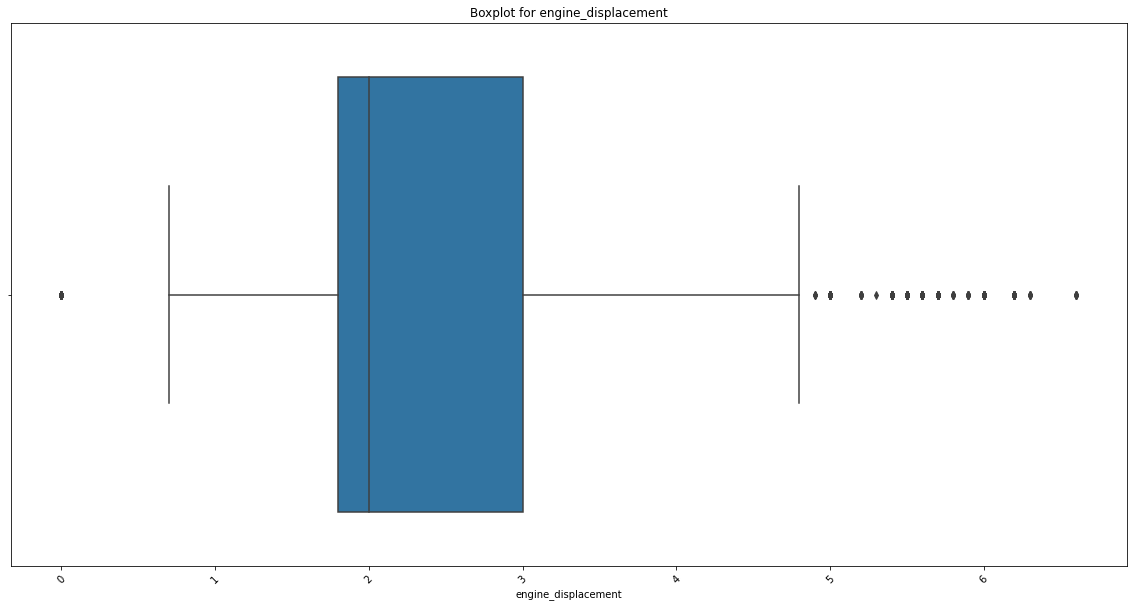

In [49]:
clear_boxplot('engine_displacement')

There are a few outliers below the lower boundary, which are the electric cars with no engine displacement, and there are a few values above the upper boundary which are cars with powerul engines. Both of them are kept.

## Models

In [50]:
df.model_name = df.model_name.apply(lambda x: x.strip().lower())
prediction_models = df.loc[df.test == 1].model_name.unique()
df = df[df.model_name.isin(prediction_models)].reset_index(
).drop('index', axis=1)

In [51]:
df.loc[df[df.model_name.isin(
    df.model_name.value_counts(normalize=True
                              )[
        df.model_name.value_counts() < 100
    ].index)].index, 'model_name'] = 'other'

C:\Users\d\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Model')

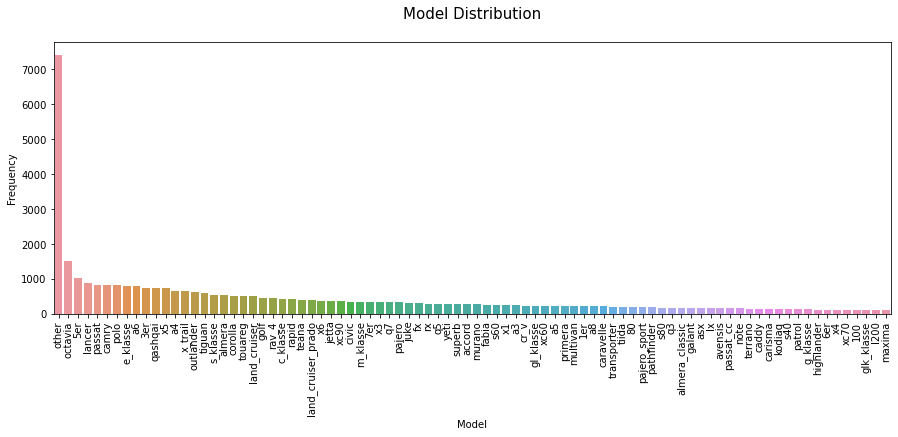

In [52]:
plt.figure(figsize=(15, 5))
sns.countplot(df['model_name'],
              order=df['model_name'].value_counts().index)
plt.title('Model Distribution\n', fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.xlabel('Model')

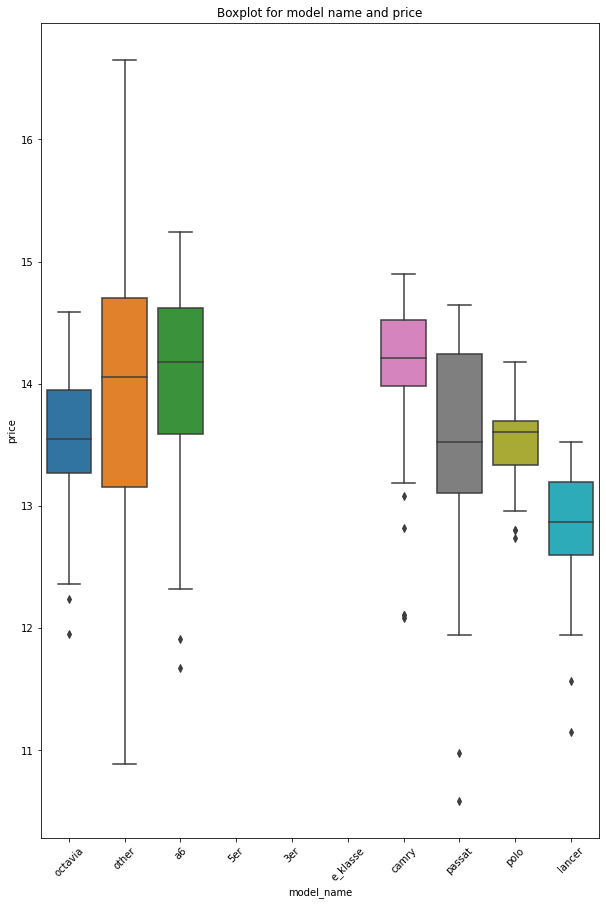

In [53]:
fig, ax = plt.subplots(figsize=(10, 15))
top10 = df['model_name'].value_counts().index[:10]
sns.boxplot(x='model_name',
            y='price',
            data=df[df.model_name.isin(top10)])
plt.xticks(rotation=45)
ax.set_title('Boxplot for model name and price')
plt.show()

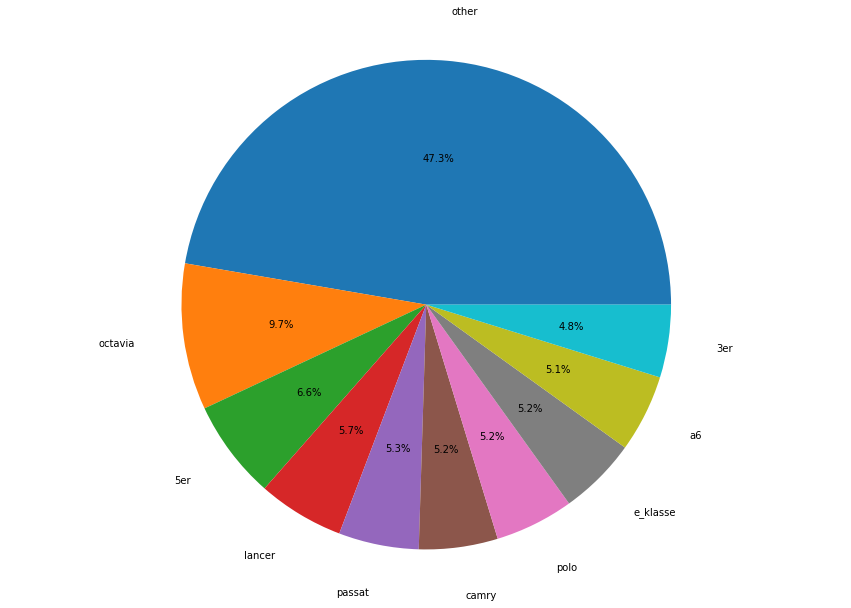

other         7408
octavia       1514
5er           1026
lancer         893
passat         829
              ... 
xc70           115
100            112
glk_klasse     105
l200           103
maxima         103
Name: model_name, Length: 86, dtype: int64

other         0.197231
octavia       0.040309
5er           0.027316
lancer        0.023775
passat        0.022071
                ...   
xc70          0.003062
100           0.002982
glk_klasse    0.002796
l200          0.002742
maxima        0.002742
Name: model_name, Length: 86, dtype: float64

In [54]:
pie('model_name')
display(df.model_name.value_counts())
display(df.model_name.value_counts(normalize=True))

The large variety of models caused a fair amount of problems. The model was tested with grouping the rare models into 'other' category and withlout it, and the first case showed a slightly better result. Due to the lack of data, certain models do not have the price value, which severely hits the accuracy of the model. 
The boundary for grouping will be shifted to test the perfomance of the model.

## Production date

C:\Users\d\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Date')

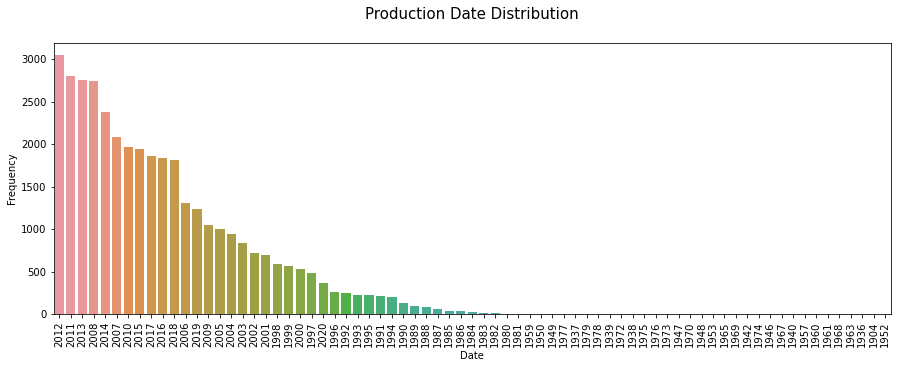

In [55]:
plt.figure(figsize=(15, 5))
sns.countplot(df['production_date'],
              order=df['production_date'].value_counts().index)
plt.title('Production Date Distribution\n', fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.xlabel('Date')

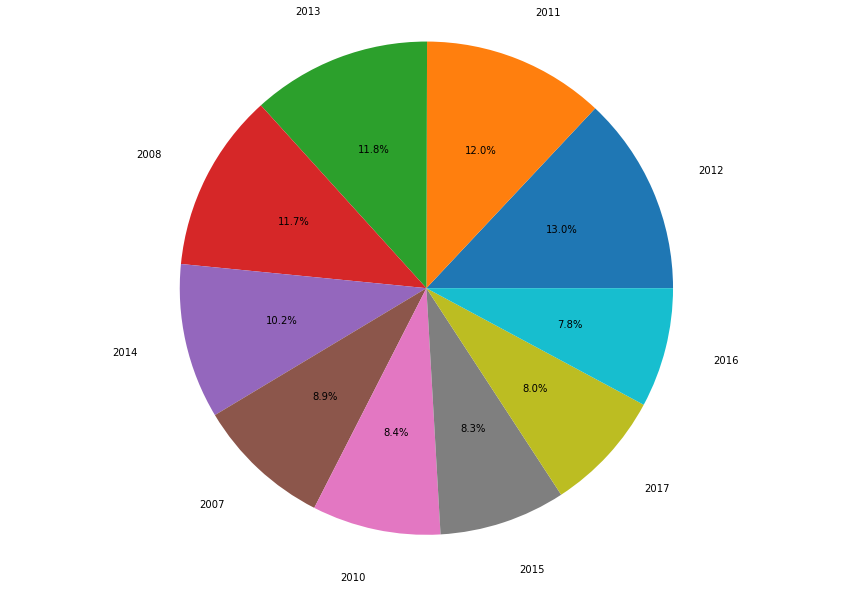

2012    3043
2011    2797
2013    2750
2008    2744
2014    2379
        ... 
1968       1
1963       1
1936       1
1904       1
1952       1
Name: production_date, Length: 73, dtype: int64

2012    0.081017
2011    0.074468
2013    0.073216
2008    0.073056
2014    0.063339
          ...   
1968    0.000027
1963    0.000027
1936    0.000027
1904    0.000027
1952    0.000027
Name: production_date, Length: 73, dtype: float64

In [56]:
pie('production_date')
display(df.production_date.value_counts())
display(df.production_date.value_counts(normalize=True))

C:\Users\d\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

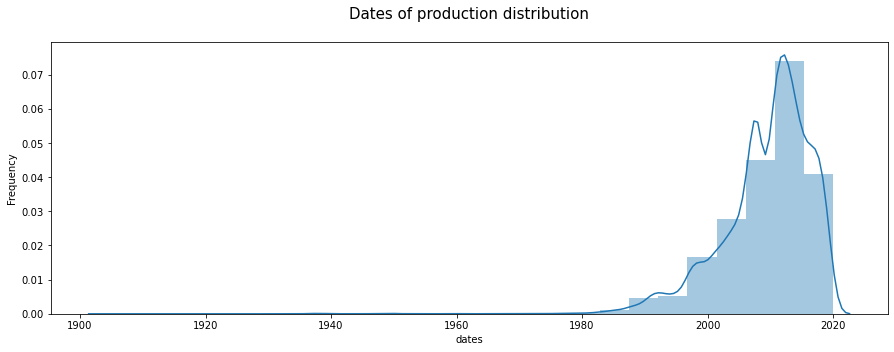

In [57]:
plt.figure(figsize=(15, 5))
sns.distplot(df.production_date.values, bins=25)
plt.title('Dates of production distribution\n', fontsize=15)
plt.xlabel('dates')
plt.ylabel('Frequency')

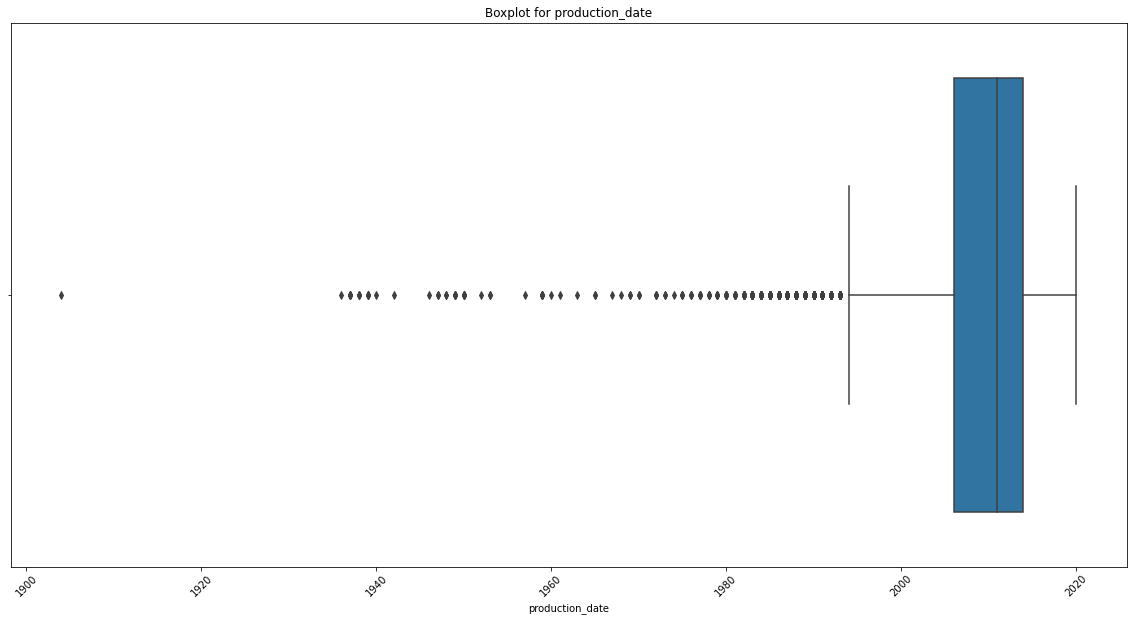

In [58]:
clear_boxplot('production_date')

In [59]:
df['production_log'] = df.production_date.apply(lambda x: np.log(x))

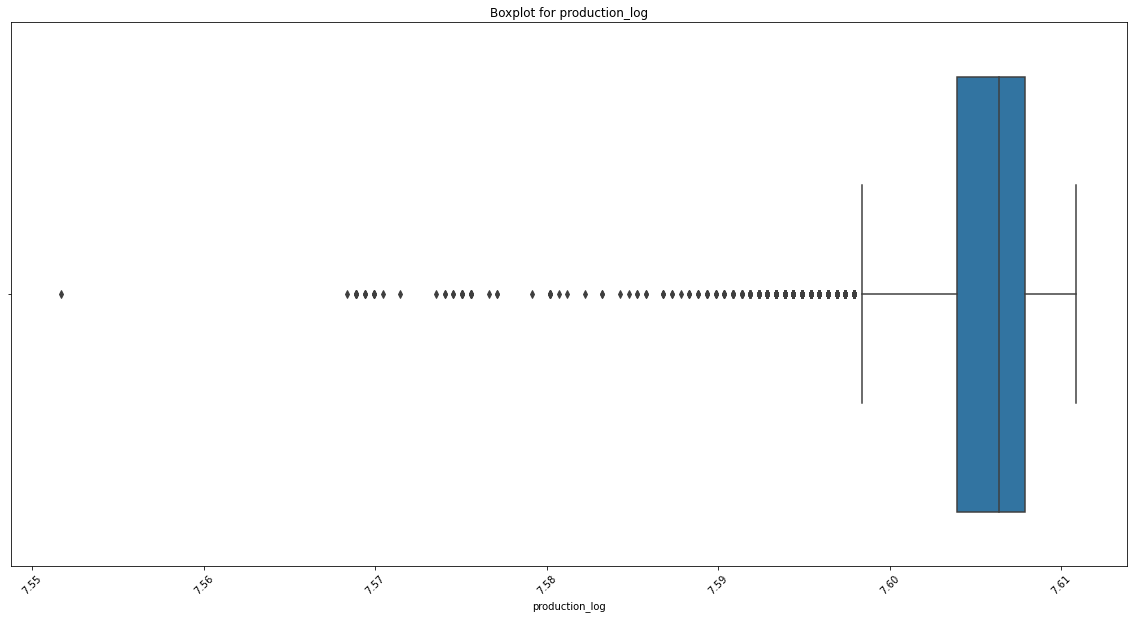

C:\Users\d\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

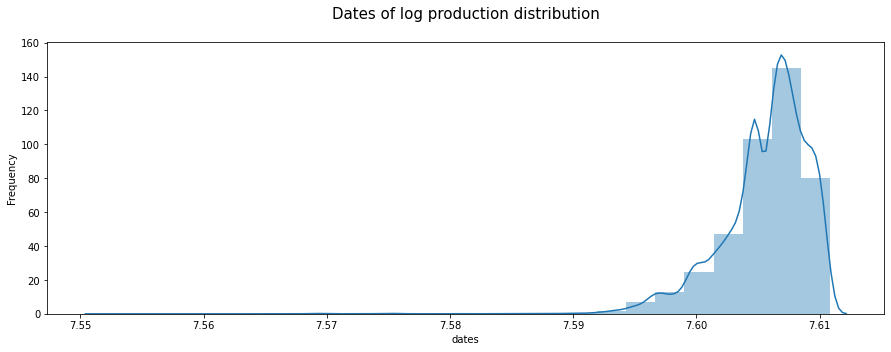

In [60]:
clear_boxplot('production_log')
plt.figure(figsize=(15, 5))
sns.distplot(df.production_log.values, bins=25)
plt.title('Dates of log production distribution\n', fontsize=15)
plt.xlabel('dates')
plt.ylabel('Frequency')

Taking the log value did not change the distribution.

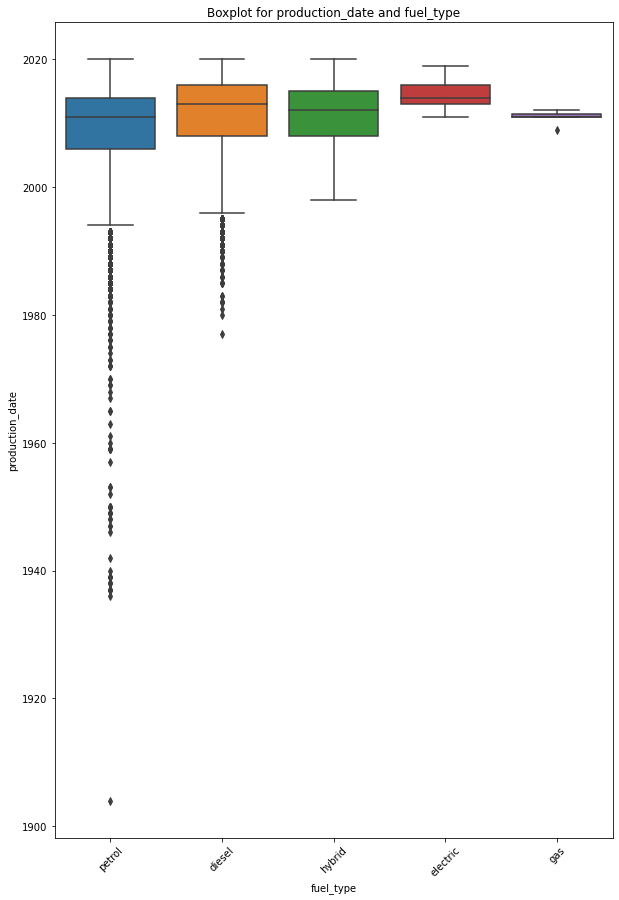

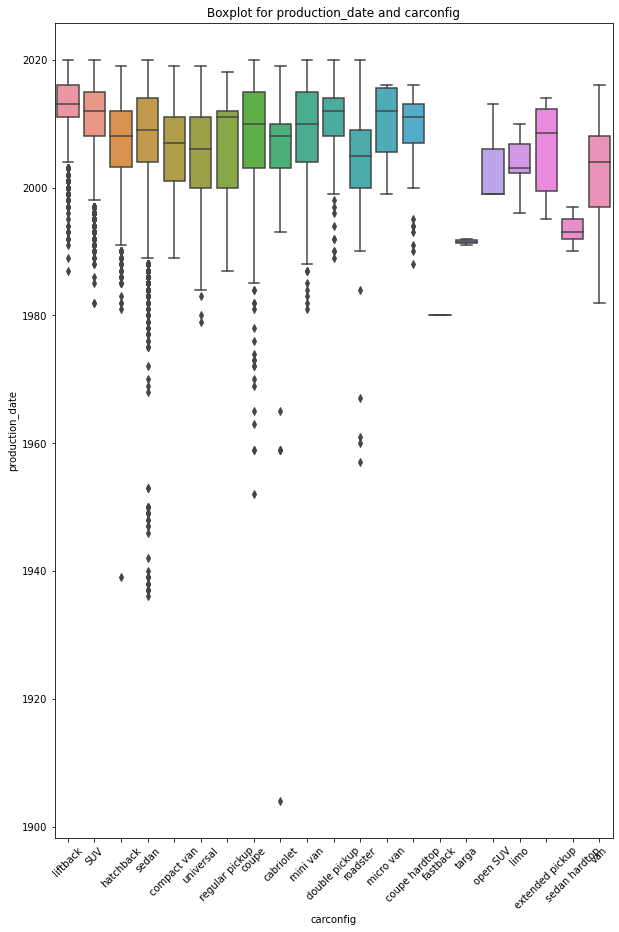

In [61]:
boxplot_numerical('fuel_type', 'production_date')
boxplot_numerical('carconfig', 'production_date')

A vast majority of cars were made around 2010, with some of them being closer to 2020 and a multiple outliers that were made in 20th century. There are a few cars in the test dataset that were made in those years, as well as a singular cabriolet from 1904, so no outliers will be removed. 

## transmission

In [62]:
# translaing the column
df.transmission = df.transmission.map(transmission)

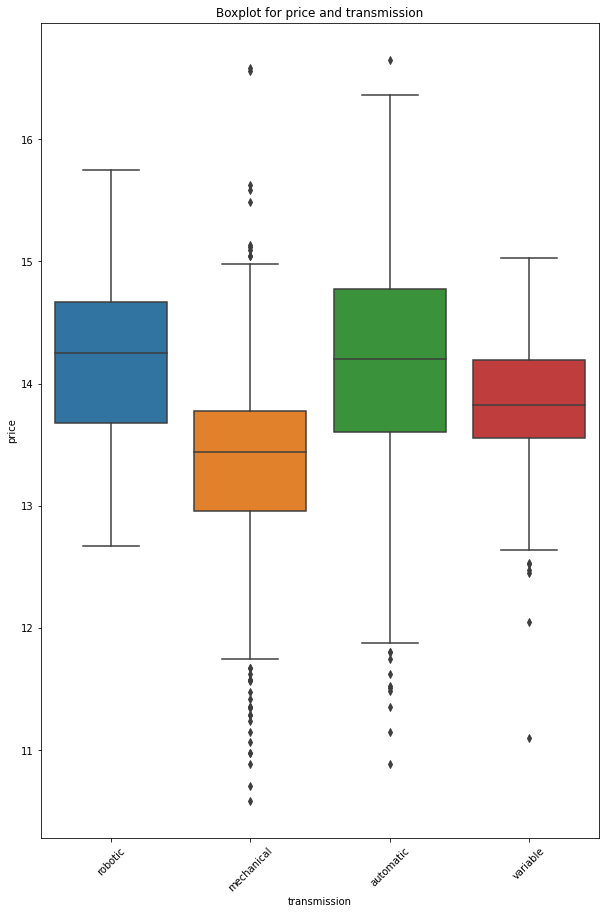

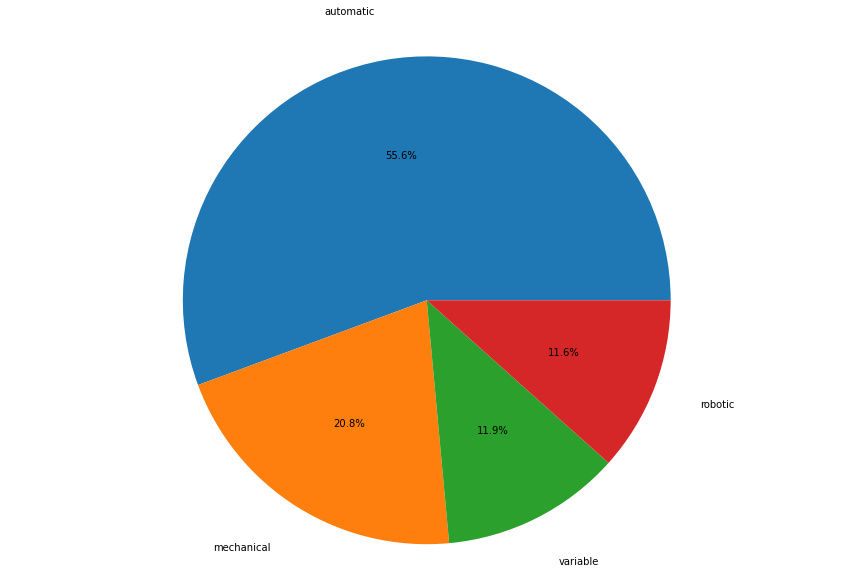

automatic     20901
mechanical     7819
variable       4478
robotic        4362
Name: transmission, dtype: int64

automatic     0.556470
mechanical    0.208174
variable      0.119223
robotic       0.116134
Name: transmission, dtype: float64

In [63]:
boxplot_numerical('transmission', 'price')
pie('transmission')
display(df.transmission.value_counts())
display(df.transmission.value_counts(normalize=True))

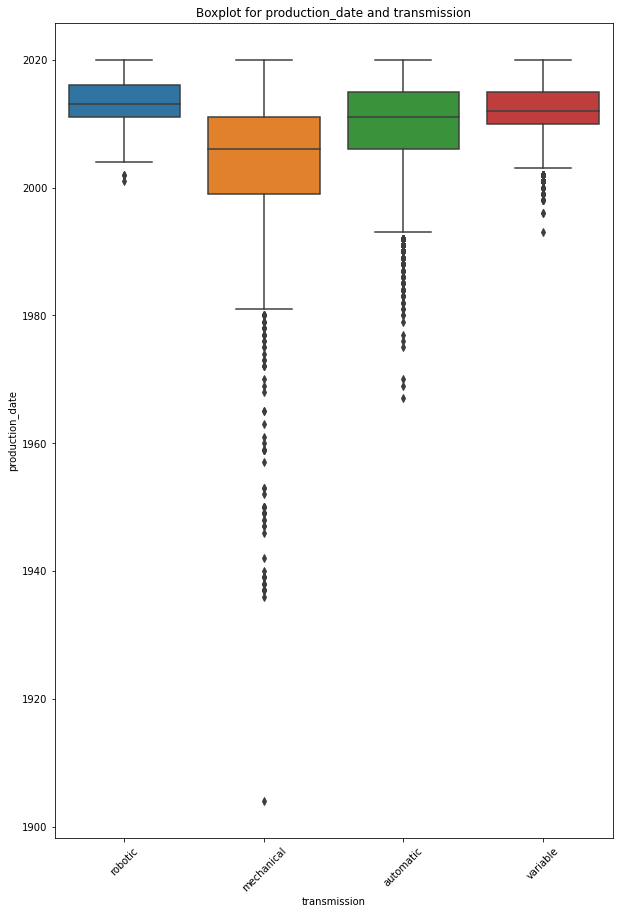

In [64]:
boxplot_numerical('transmission', 'production_date')

Automatic transmission appears to be the most common in the modern cars, while older cars tend to have mechanical transmission, which is also the cheapest one. Robotic transmission is the newest type, started appearing in early 21st century and became common only by 2010's, it is also the most expensive type of transmission.

## owners

In [65]:
# translaing the column
df.owners = df.owners.map(owners)

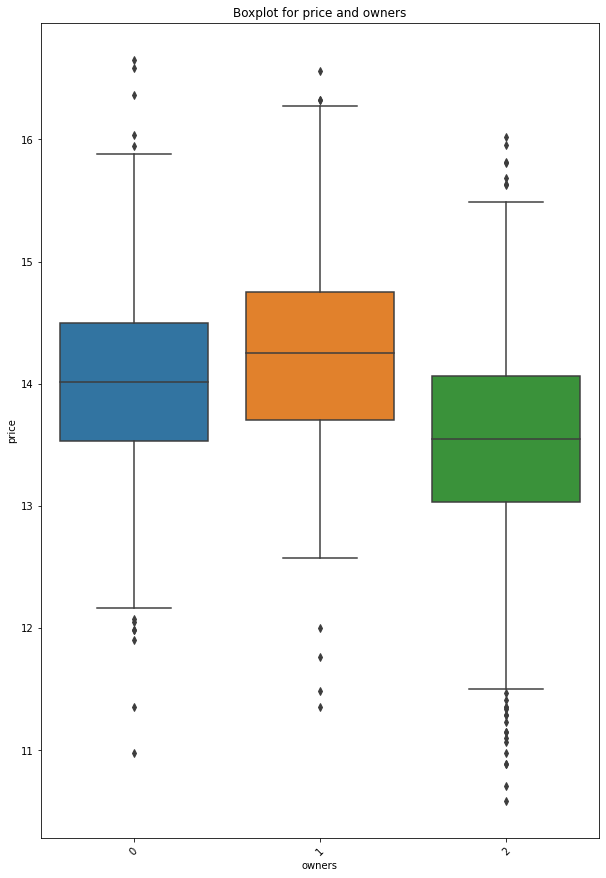

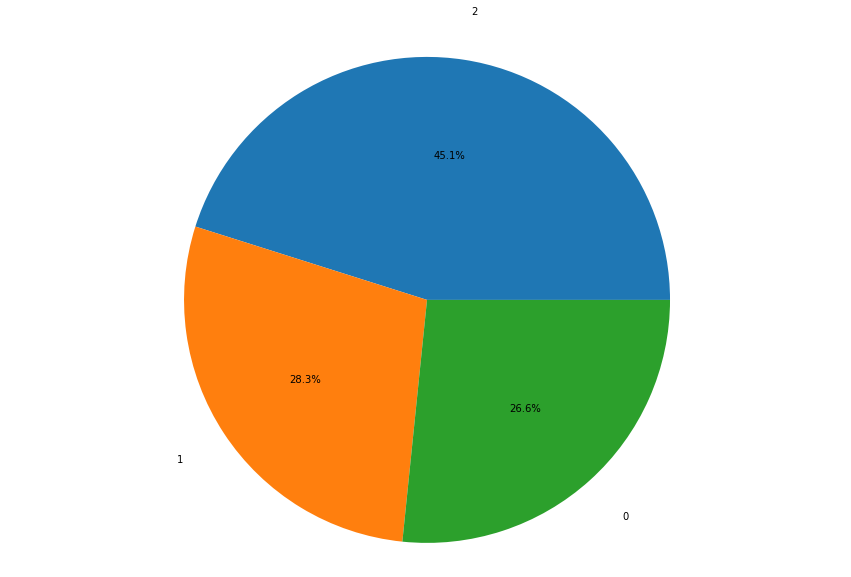

2    16947
1    10615
0     9998
Name: owners, dtype: int64

2    0.451198
1    0.282614
0    0.266187
Name: owners, dtype: float64

In [66]:
boxplot_numerical('owners', 'price')
pie('owners')
display(df.owners.value_counts())
display(df.owners.value_counts(normalize=True))

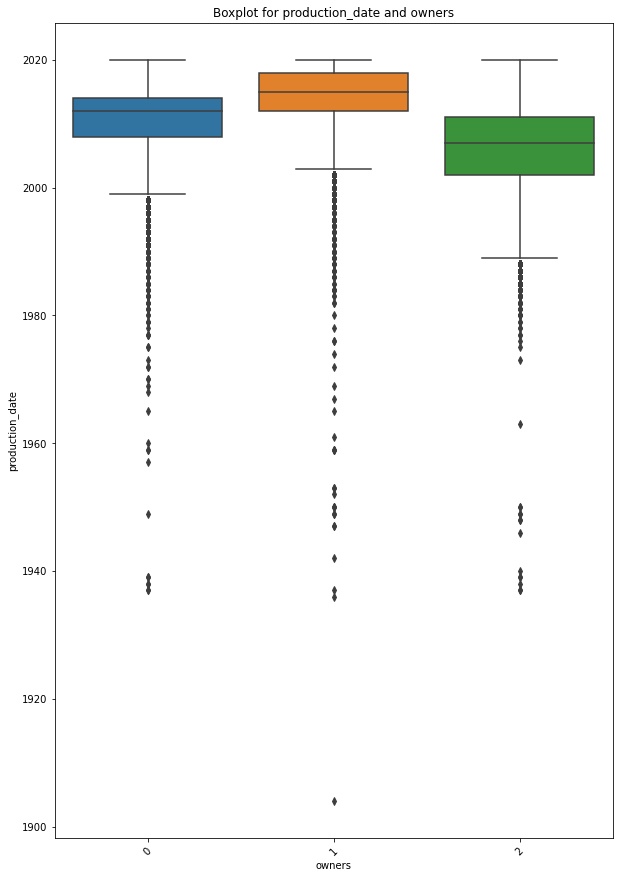

In [67]:
boxplot_numerical('owners', 'production_date')

Most cars appear to be family cars with 3 or more owners. Also it seems that families tend to buy cheaper and older cars, while cars with two owners tend to be newer and more expensive. Maybe couples pull money together to buy a car more often than families?

## Driving unit

In [68]:
# translaing the column
df.drive_unit = df.drive_unit.map(drive_unit)

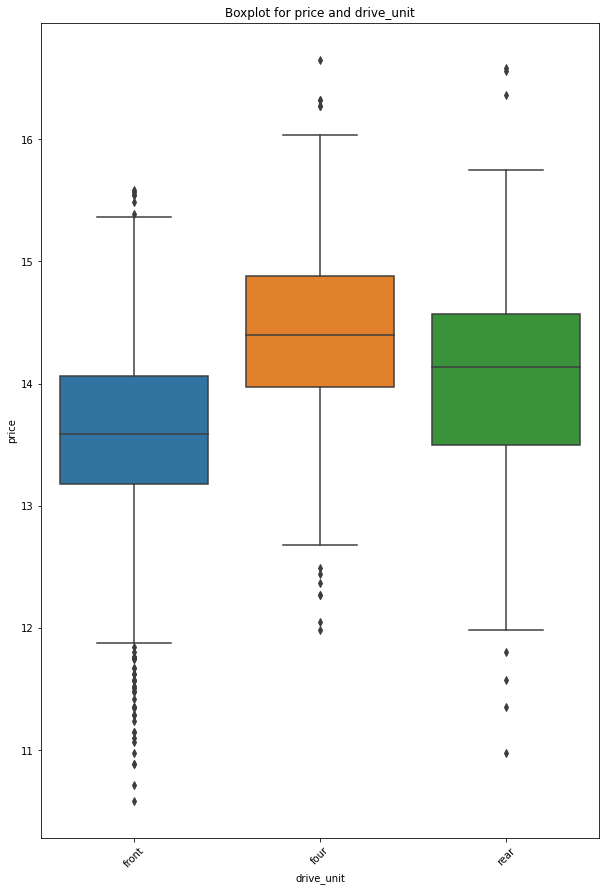

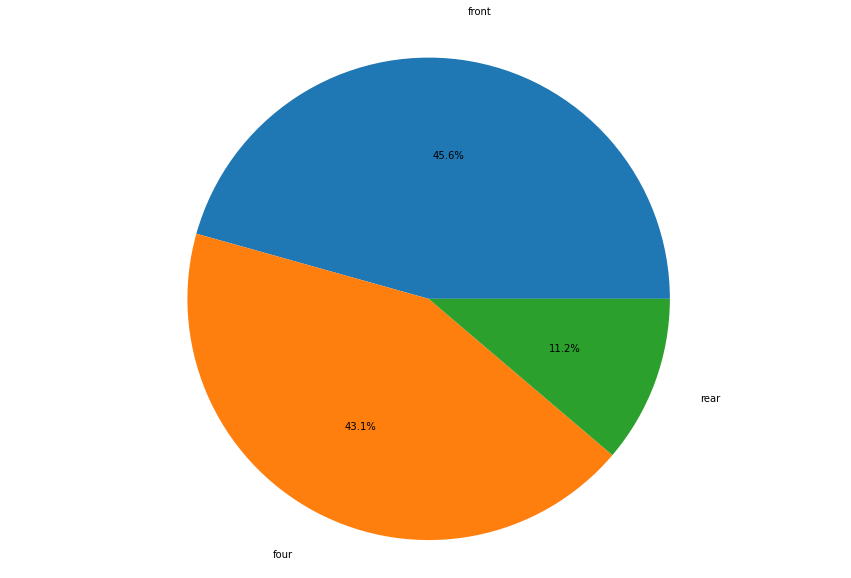

front    17146
four     16200
rear      4214
Name: drive_unit, dtype: int64

front    0.456496
four     0.431310
rear     0.112194
Name: drive_unit, dtype: float64

In [69]:
boxplot_numerical('drive_unit', 'price')
pie('drive_unit')
display(df.drive_unit.value_counts())
display(df.drive_unit.value_counts(normalize=True))

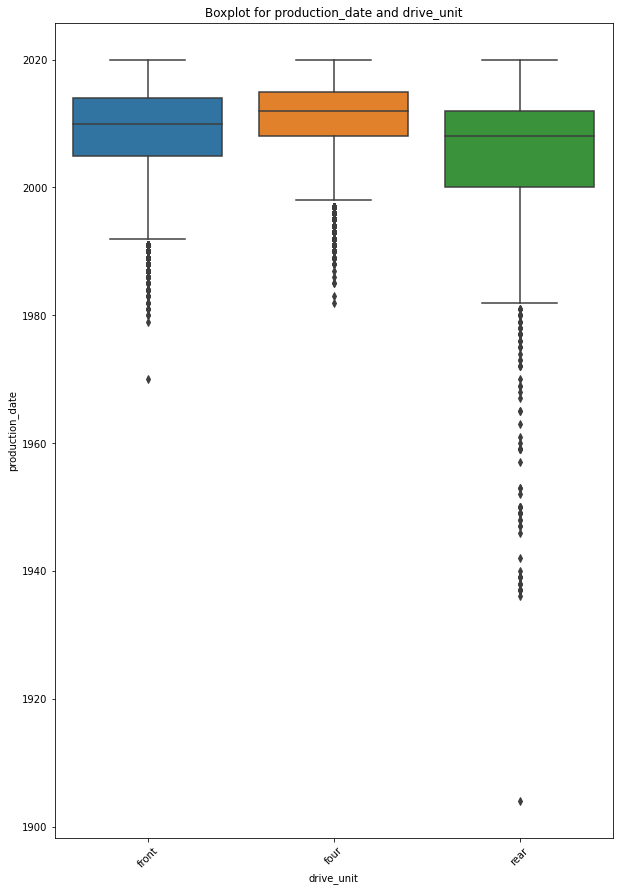

In [70]:
boxplot_numerical('drive_unit', 'production_date')

Four-wheel driving unit is the one that appeared the latest, but also the most expensive one. Modern cars much less often use rear driving unit, yet the cars with rear riving unit tend to be more expensive, than the front one. Most likely this is due to many old cars being retro cars and them being more expensive.

## Licence

In [71]:
# now shows wheather a licence is an original(1) or not(0)
df.licence = df.licence.map(licences)

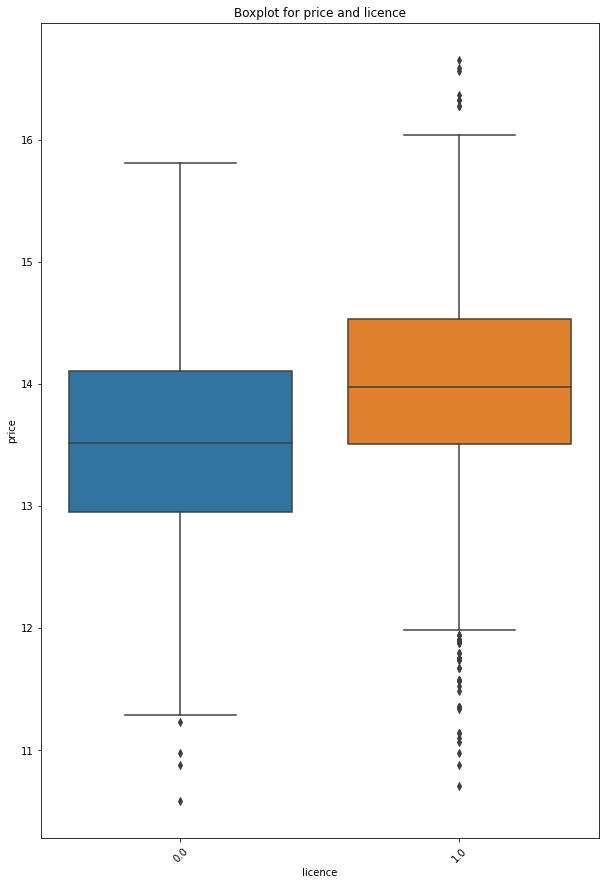

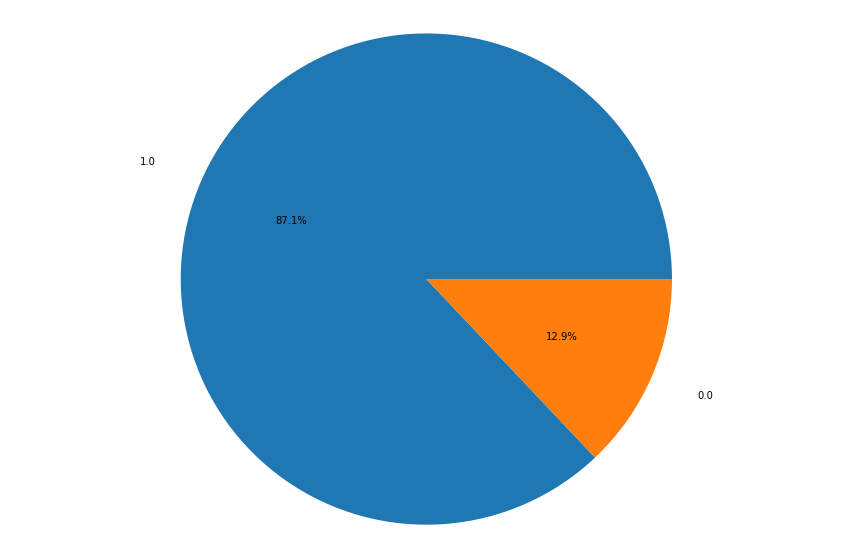

1.0    32696
0.0     4863
Name: licence, dtype: int64

1.0    0.870524
0.0    0.129476
Name: licence, dtype: float64

In [72]:
boxplot_numerical('licence', 'price')
pie('licence', None)
display(df.licence.value_counts())
display(df.licence.value_counts(normalize=True))

In [73]:
# Only one empty value will be filled with
# the most common value, that being 1(original)
df.loc[df.licence.isna(), 'licence'] = 1

Most cars have an original licence, and the cars with the original licence are more expensive.

## Driving wheel

In [74]:
# shows wheather a driving wheel is on the right side or not
df.wheel = df.wheel.map(steering_wheels)

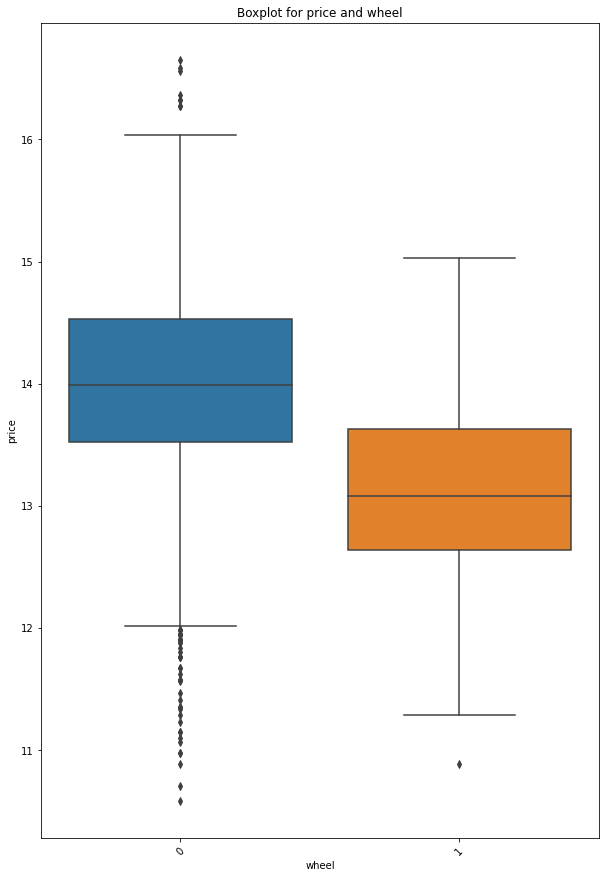

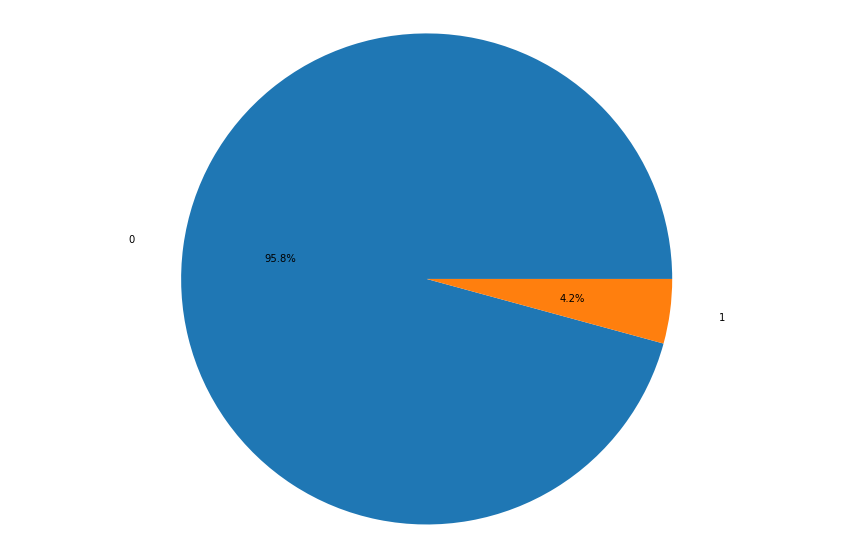

0    35968
1     1592
Name: wheel, dtype: int64

0    0.957614
1    0.042386
Name: wheel, dtype: float64

In [75]:
boxplot_numerical('wheel', 'price')
pie('wheel', None)
display(df.wheel.value_counts())
display(df.wheel.value_counts(normalize=True))

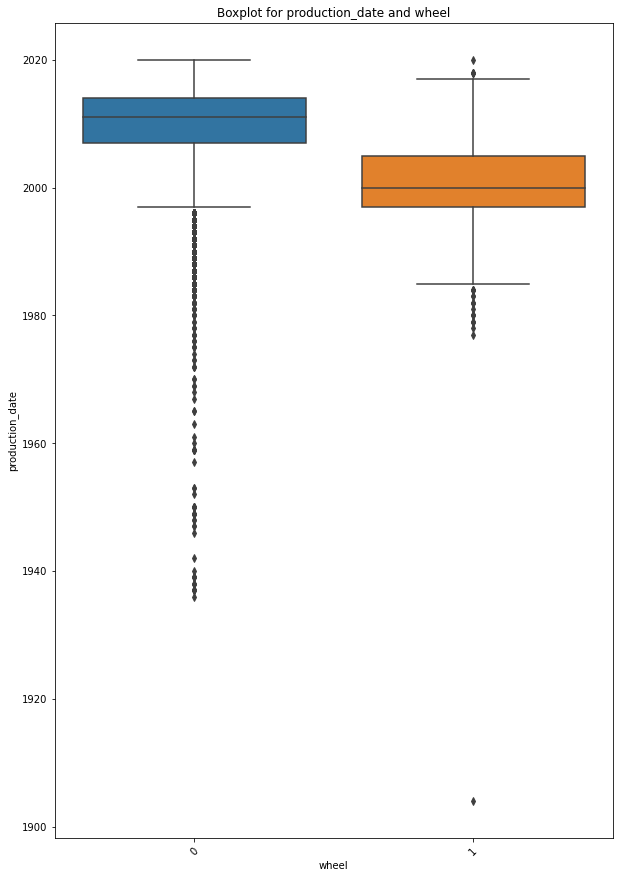

In [76]:
boxplot_numerical('wheel', 'production_date')

Most cars have a driving wheel on a left side, and the cars with the wheel on a right side tend to be cheaper. Probably due to the fact that such cars are not fitted for right-sided system used in Russia.

## Vendor
Vendor depends on the brand, so Japanese and European vendors will be separated.

In [77]:
japanese_brands = df[df['vendor'] == 'JAPANESE'].brand.unique()

In [78]:
df.vendor = df.brand.apply(lambda x: 0 if x in japanese_brands else 1)

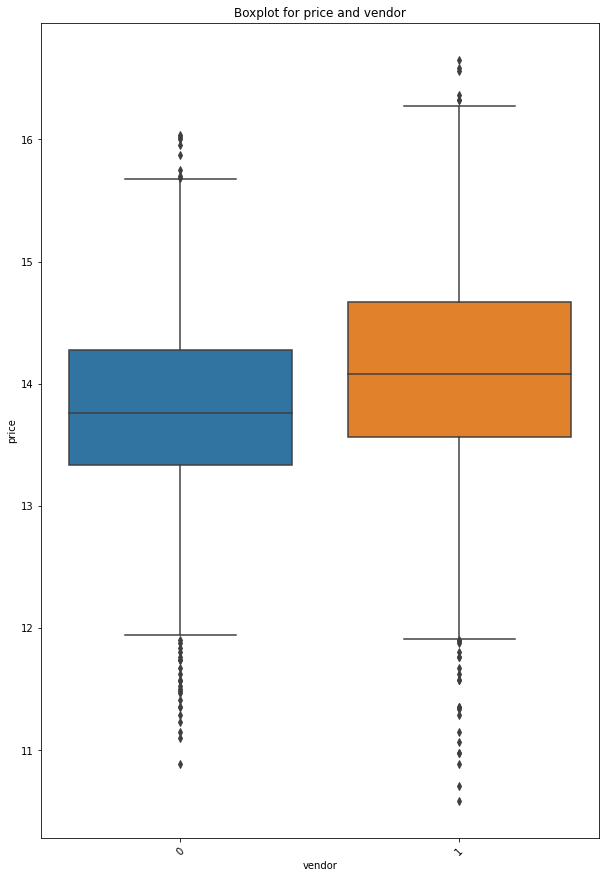

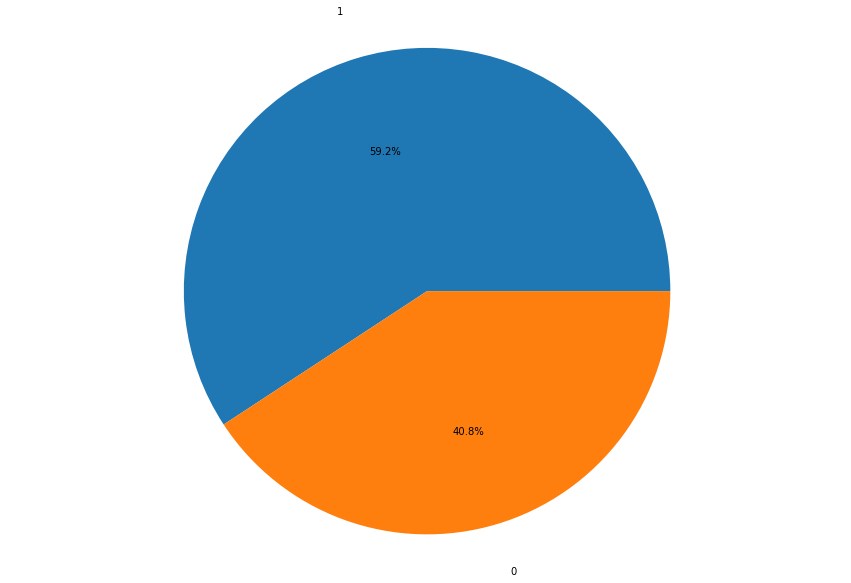

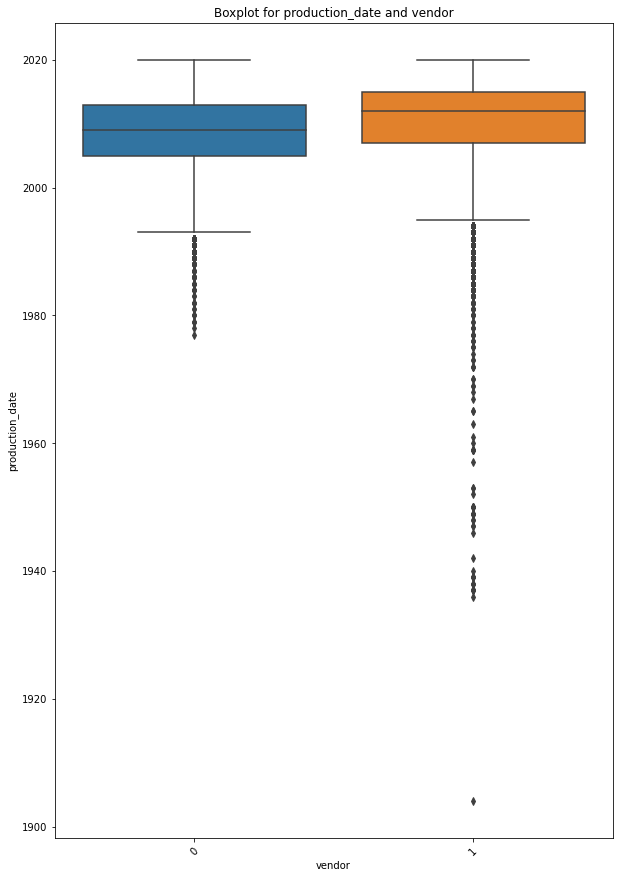

1    22250
0    15310
Name: vendor, dtype: int64

1    0.592386
0    0.407614
Name: vendor, dtype: float64

In [79]:
boxplot_numerical('vendor', 'price')
pie('vendor', None)
boxplot_numerical('vendor', 'production_date')
display(df.vendor.value_counts())
display(df.vendor.value_counts(normalize=True))

There are slighly more European Vendors, and their cars tend to be both newer and more expensive.

## Power

C:\Users\d\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

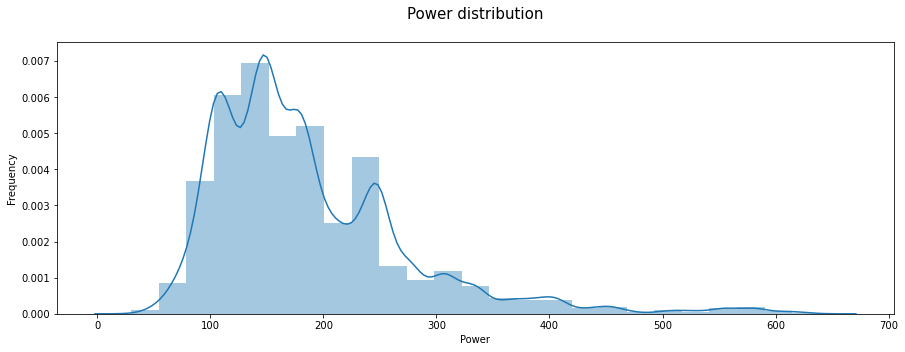

In [80]:
plt.figure(figsize=(15, 5))
sns.distplot(df.power.values, bins=25)
plt.title('Power distribution\n', fontsize=15)
plt.xlabel('Power')
plt.ylabel('Frequency')

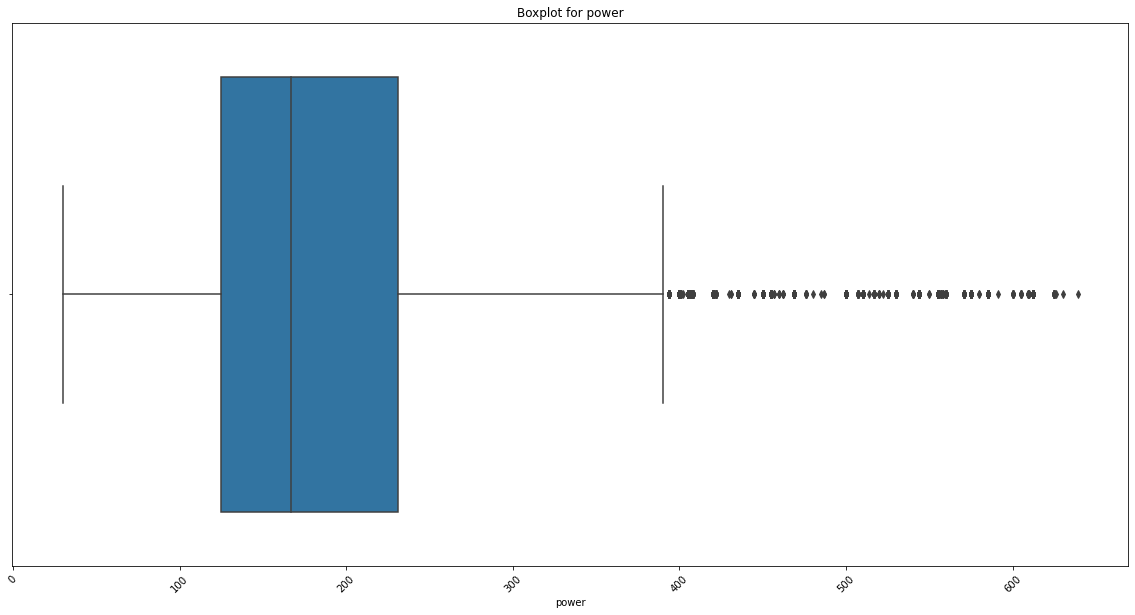

In [81]:
clear_boxplot('power')

Distribution has a clear left sided tail, so the data will be logged to attempt to shift distribution to a pattern of a normal one.

In [82]:
df['power_log'] = df.power.apply(lambda x: np.log(x))

C:\Users\d\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

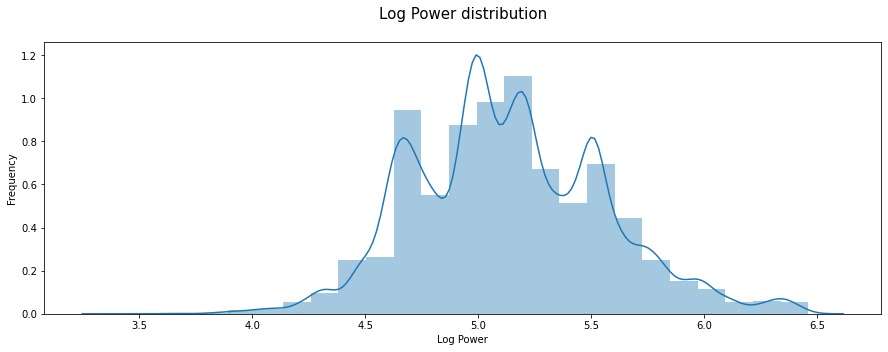

In [83]:
plt.figure(figsize=(15, 5))
sns.distplot(df.power_log.values, bins=25)
plt.title('Log Power distribution\n', fontsize=15)
plt.xlabel('Log Power')
plt.ylabel('Frequency')

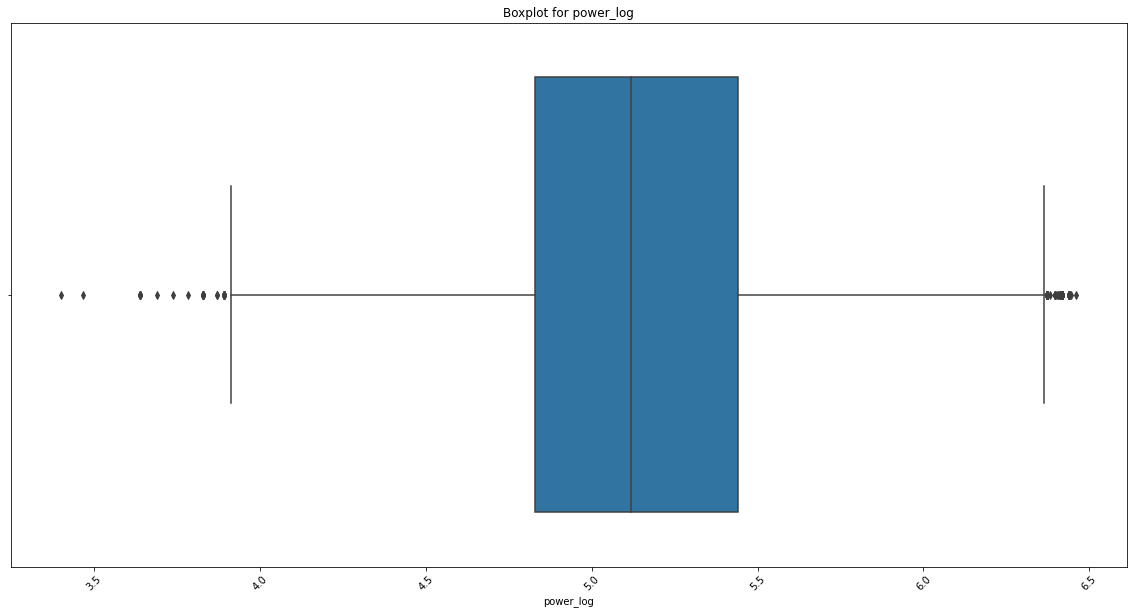

In [84]:
clear_boxplot('power_log')

In [85]:
lower_boundary = df.power_log.quantile(0.25) - 1.5*(
    df.power_log.quantile(0.75) - df.power_log.quantile(0.25))


df = df.loc[(df.test == 1) | (df.power_log >= lower_boundary)]

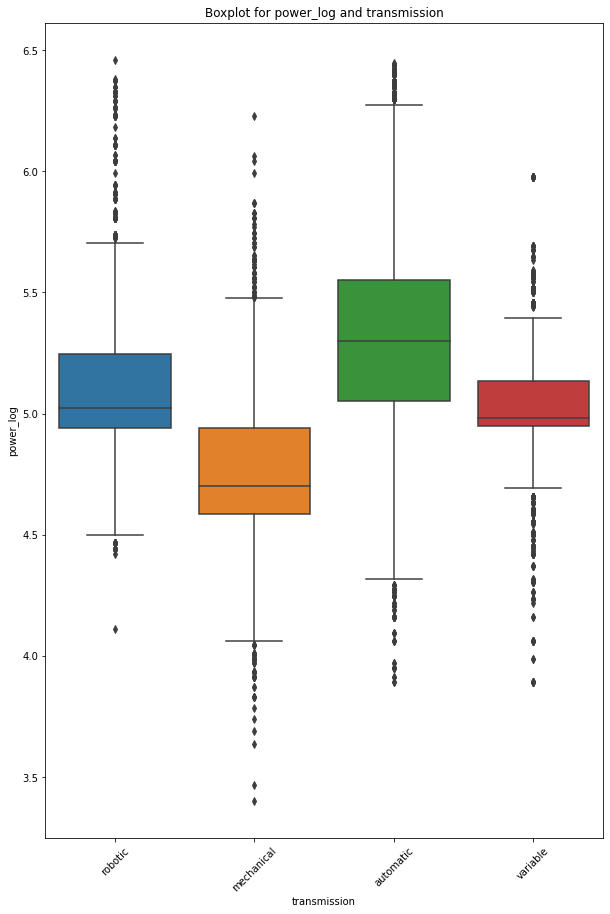

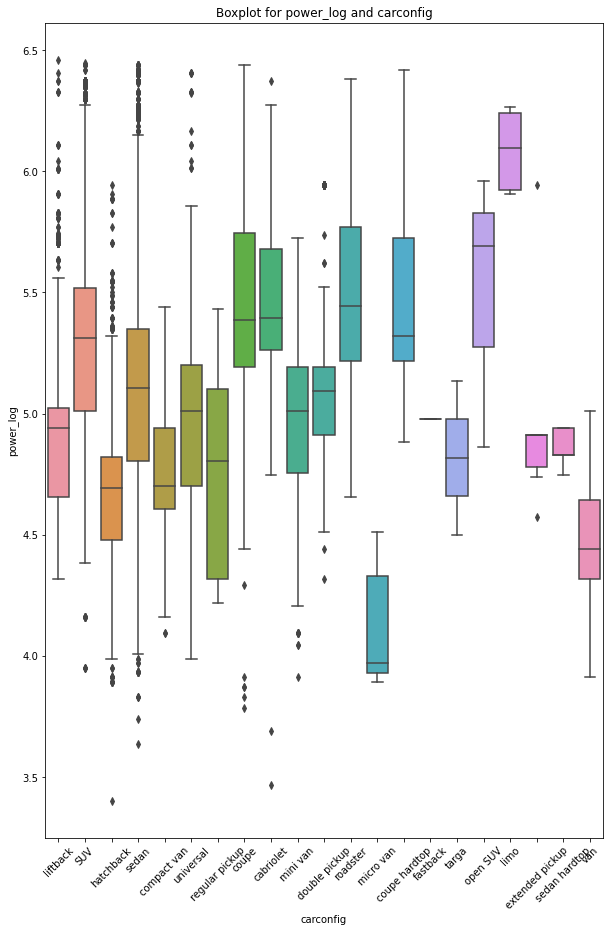

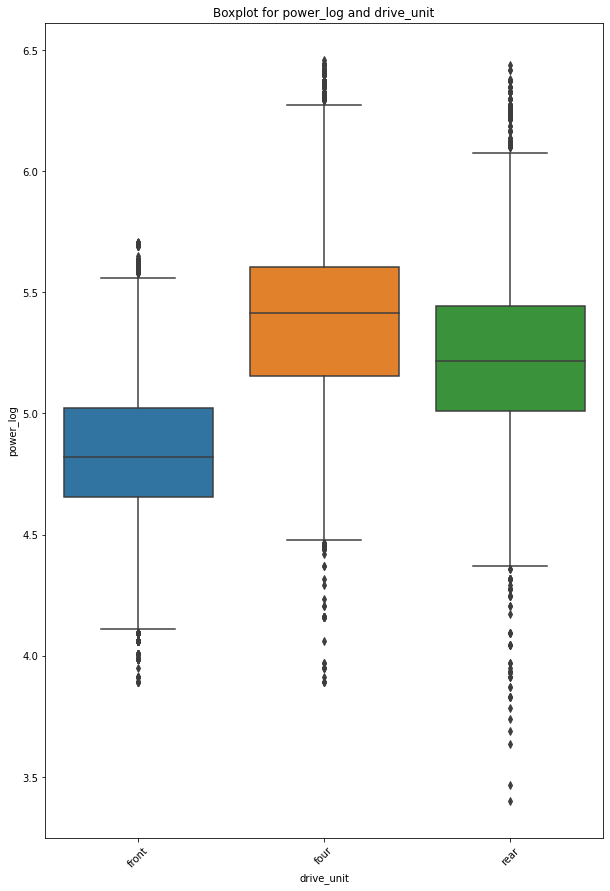

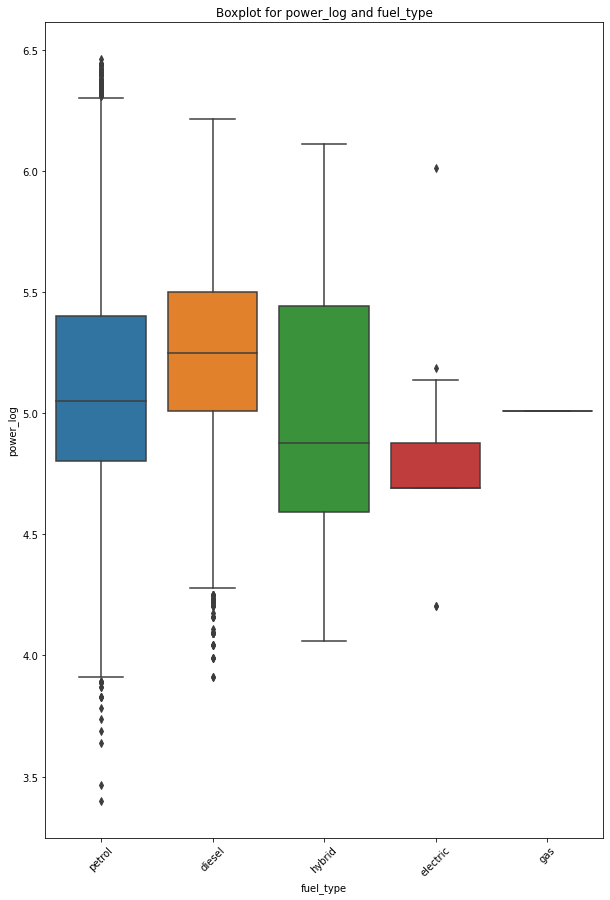

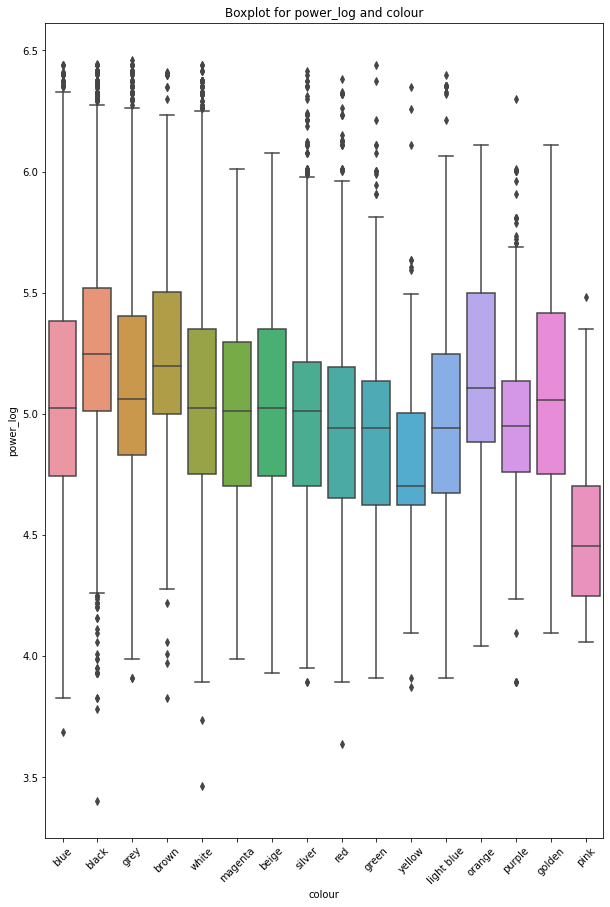

In [86]:
for column in ['transmission', 'carconfig',
               'drive_unit', 'fuel_type',
               'colour']:
    boxplot_numerical(column, 'power_log')

Taking the log value did shift the distribution to be make it more alike normal one. Some cars with low power would appear to be old ones, yet they were fairly modern(2000+), so the cars with power below the lower boundary were dropped. The cars above the upper boundary are SUVs and limos, which tend to need a powerful engine, so they are kept. This can also be seen from the boxplots - SUVs and limos have a higher median power. 

Cars with diesel engine tend to be the most powerful ones, while electric cars are a bit lacking. Gas cars do not have a proper range of values, so the value is not representative.

Four wheel driving unit cars tend to be more powerful. 

Most cars have a fairly similar range of engine depending on power, with only yellow and pink having a significantly lower median. Black cars tend to have a higher median, probably due to many limos being primarily black.

## Number of Doors

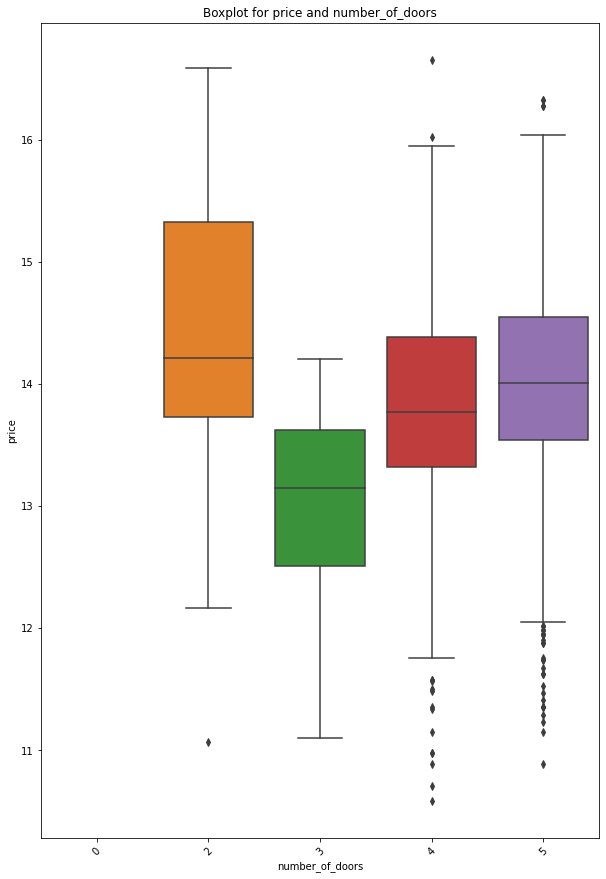

In [87]:
boxplot_numerical('number_of_doors', 'price')

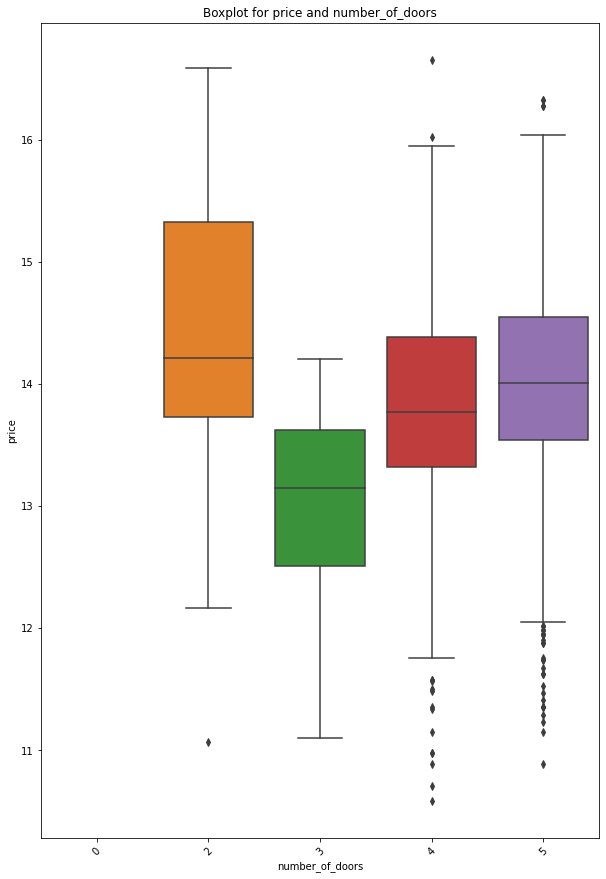

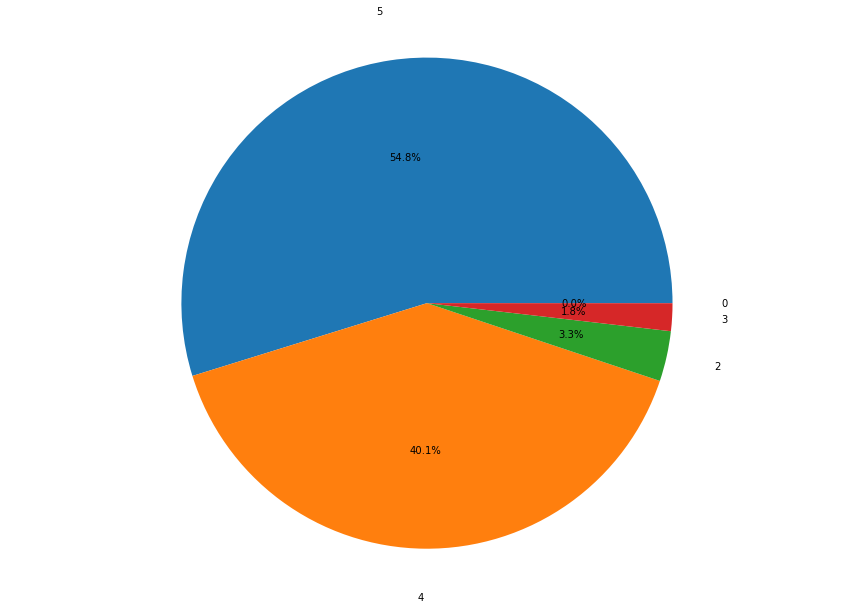

5    20569
4    15048
2     1240
3      684
0        1
Name: number_of_doors, dtype: int64

5    0.547893
4    0.400831
2    0.033030
3    0.018220
0    0.000027
Name: number_of_doors, dtype: float64

In [88]:
boxplot_numerical('number_of_doors', 'price')
pie('number_of_doors', None)
display(df.number_of_doors.value_counts(dropna=False))
display(df.number_of_doors.value_counts(normalize=True))

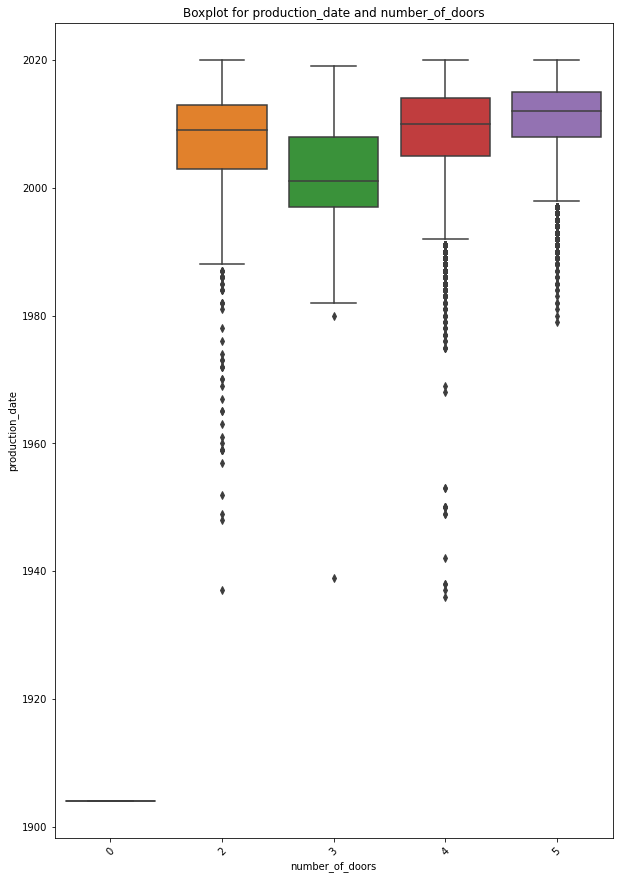

In [89]:
boxplot_numerical('number_of_doors', 'production_date')

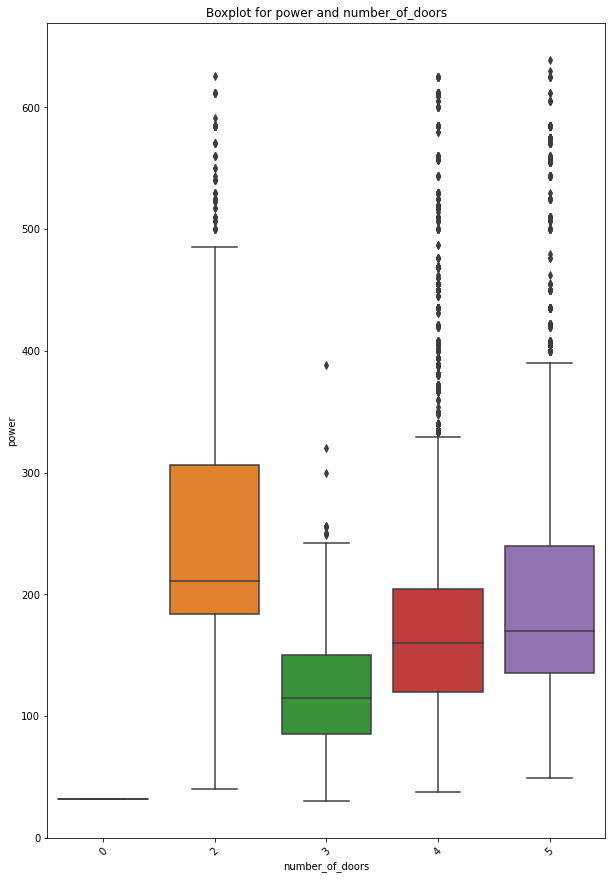

In [90]:
boxplot_numerical('number_of_doors', 'power')

Text(27.0, 0.5, 'Price')

<Figure size 1080x360 with 0 Axes>

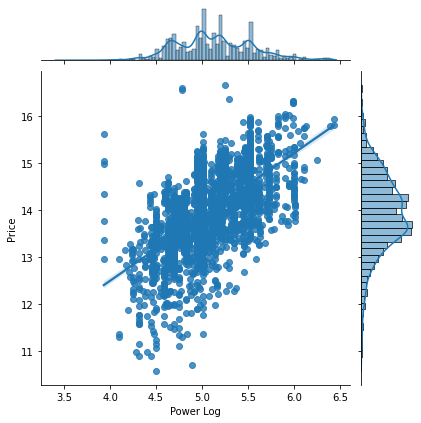

In [91]:
plt.figure(figsize=(15, 5))
sns.jointplot(x='power_log',
              y='price',
              data=df,
              kind='reg')
plt.xlabel('Power Log')
plt.ylabel('Price')

Cars with two doors tend to be the most expesive and the most powerful ones. There is only one car with no doors, this being a 1904 cabriolet from test dataset, so it can not be dropped. Vast majority of cars have 5 doors, which means that the boot is probably counted as one(?).  Cars with 5 doors tend to be the newest ones, while cars with 3 doors are older, cheaper and less powerful than the rest. The outliers are kept.
As the power increases, the price increases.

## age

In [92]:
def get_age(age):
    # the function takes in the string of the age of the car
    # and separates the numbers out of it, convering year and
    # month inco a single decimal value
    pattern = '\d+'
    numbers = re.findall(pattern, age)
    if len(numbers) == 1:
        age = int(numbers[0])
    else:
        years = int(numbers[0])
        month = int(numbers[1])
        age = years + month/12
    return age

In [93]:
df.loc[~df.age.isna(), 'age'] = df.loc[~df.age.isna(), 'age'].apply(get_age)
# if the age is not mentioned, assume that it was bought during production year
df.loc[df.age.isna(), 'age'] = 2020 - df['production_date']

C:\Users\d\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

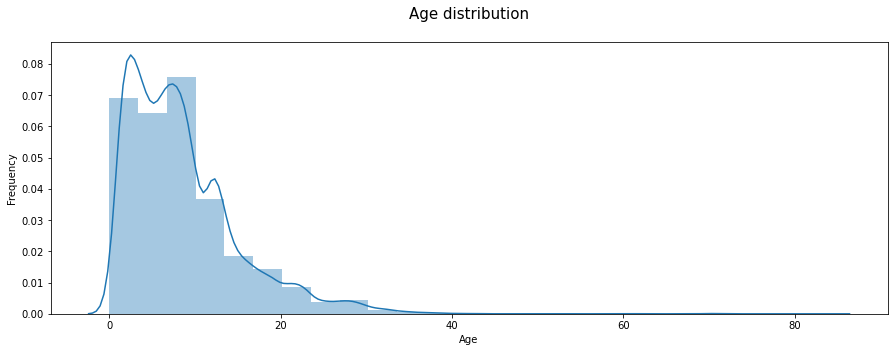

In [94]:
plt.figure(figsize=(15, 5))
sns.distplot(df.age.values, bins=25)
plt.title('Age distribution\n', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Frequency')

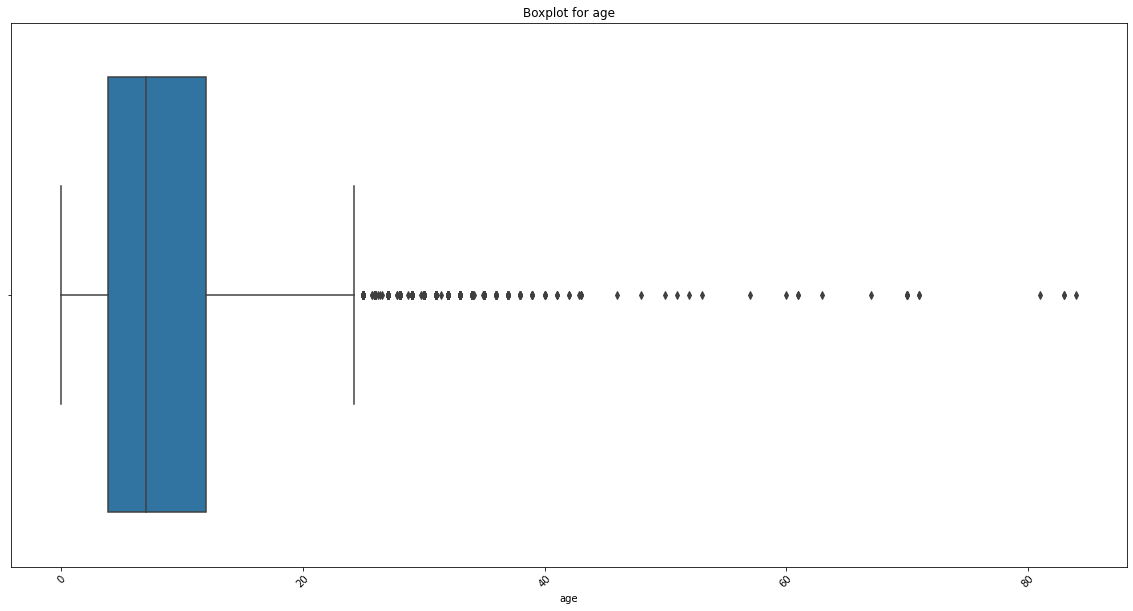

In [95]:
clear_boxplot('age')

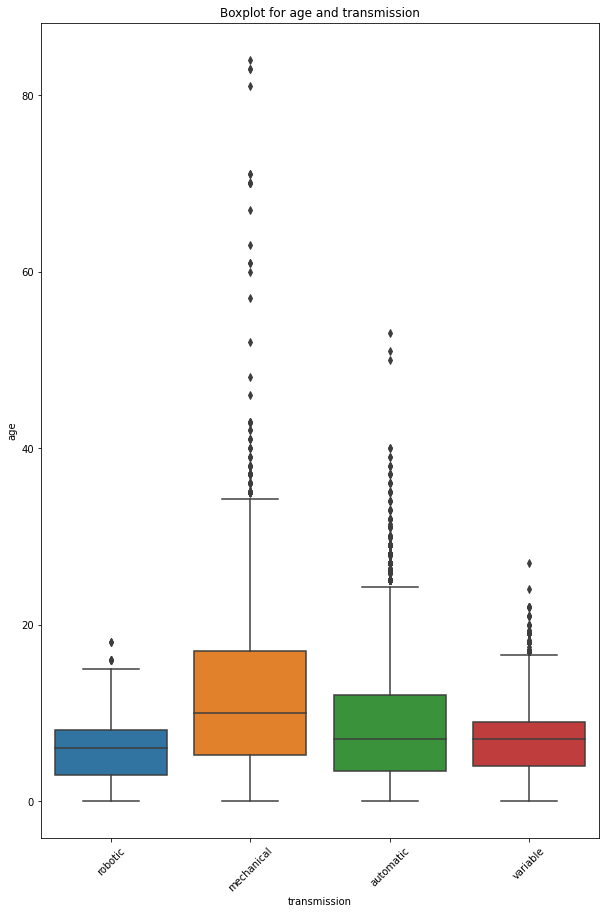

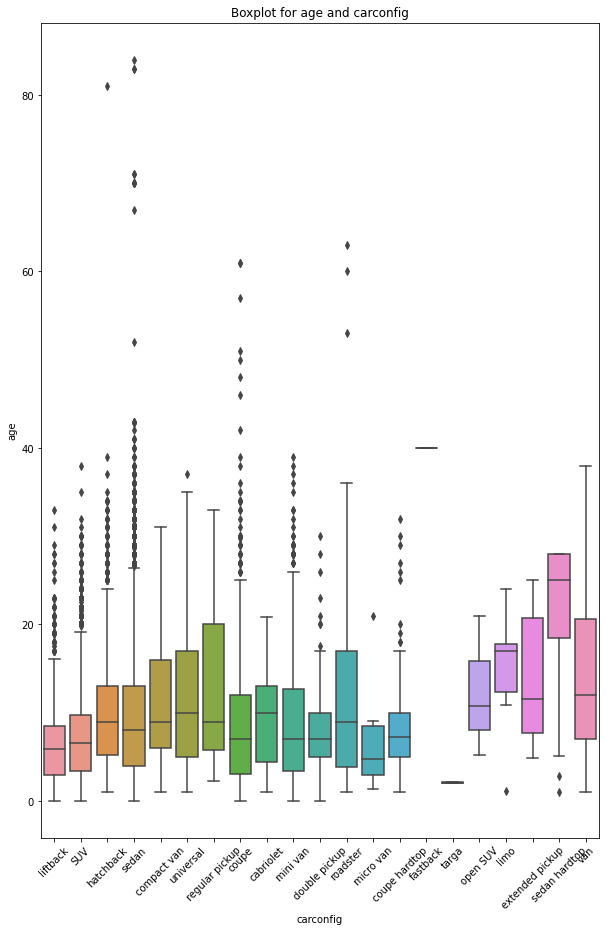

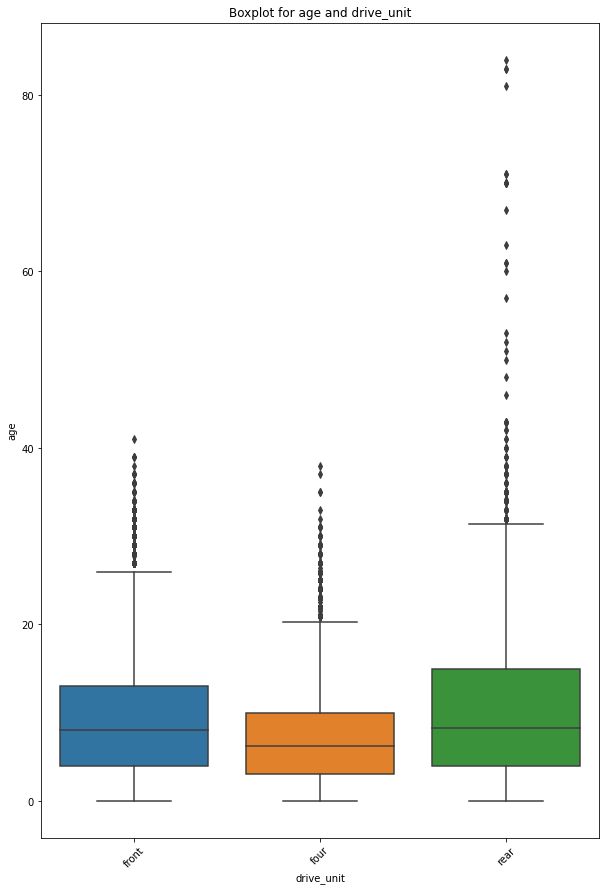

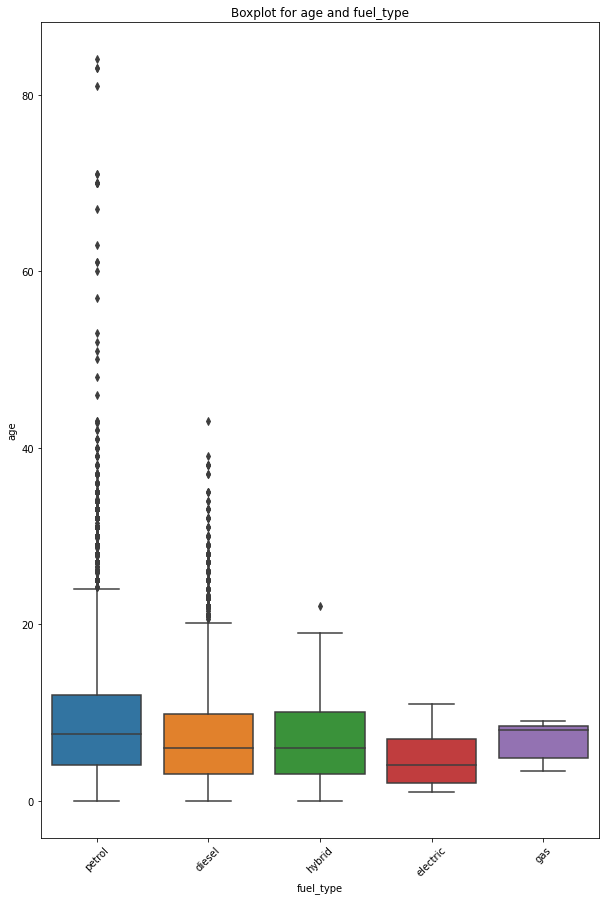

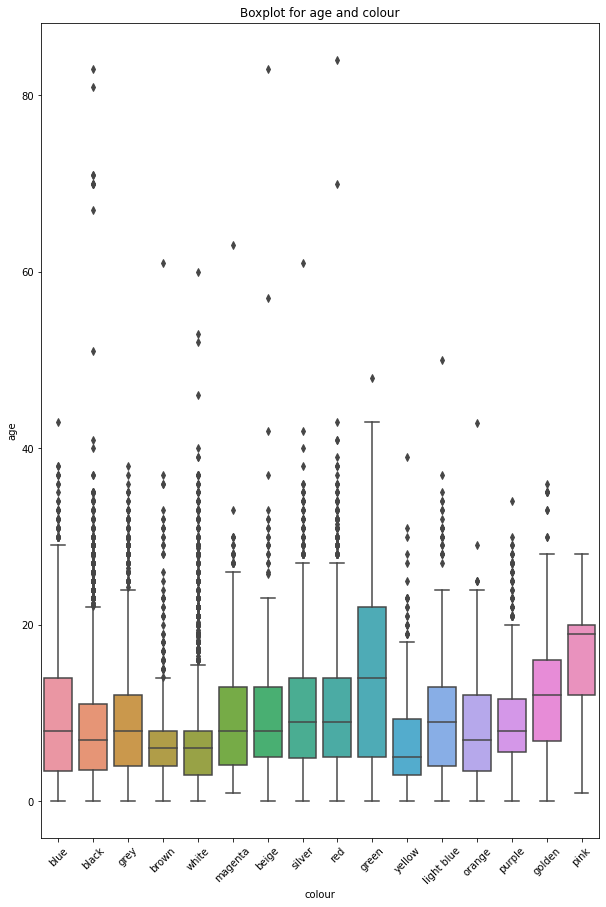

In [96]:
for column in ['transmission', 'carconfig',
               'drive_unit', 'fuel_type',
               'colour']:
    boxplot_numerical(column, 'age')

Just as before, some of the ages that are in the outliers are from the information about the cars in the test dataset, so they can not be dropped. Most cars have an age of less than 20 years.
The graphs do not hold any new information, with the exception that pink and green cars appear to be older, while brown, white and yellow tend to be newer. Green cars have a very broad range of values.
Older cars tend to be cheaper. 

## Mileage

C:\Users\d\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

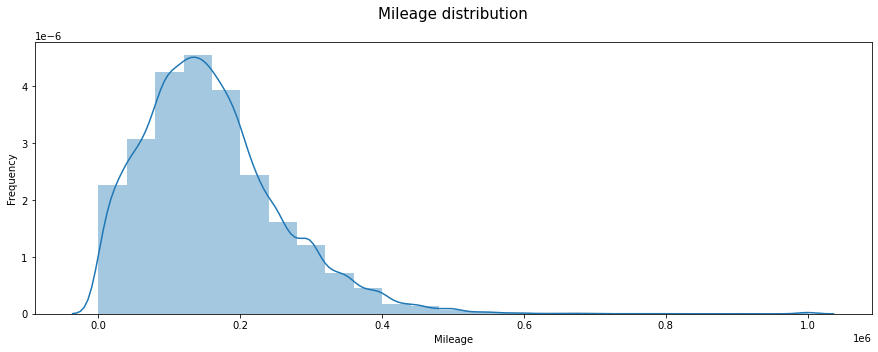

In [97]:
plt.figure(figsize=(15, 5))
sns.distplot(df.mileage.values, bins=25)
plt.title('Mileage distribution\n', fontsize=15)
plt.xlabel('Mileage')
plt.ylabel('Frequency')

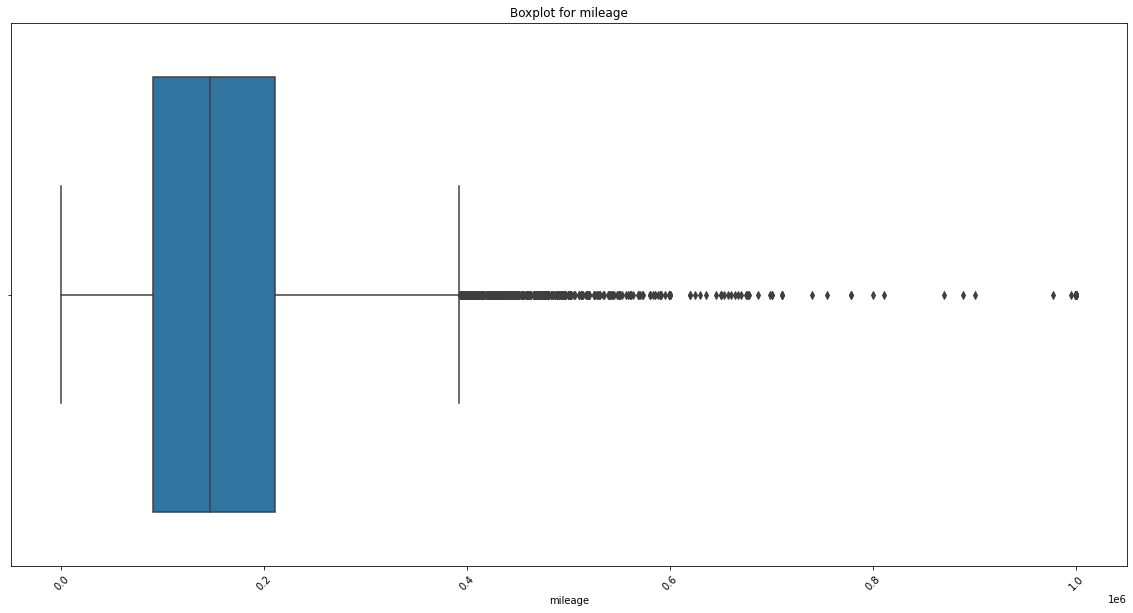

In [98]:
clear_boxplot('mileage')

As usual, try to shift the distribution to make it closer to normal by taking a log value

In [99]:
df['mileage_log'] = df.mileage.apply(lambda x: np.log(x+1))

C:\Users\d\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

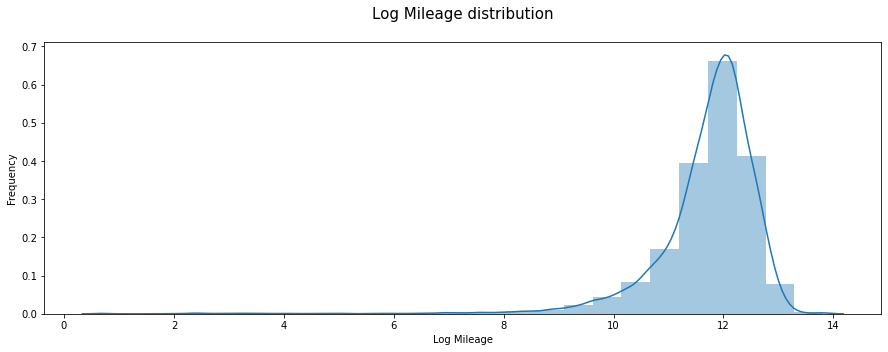

In [100]:
plt.figure(figsize=(15, 5))
sns.distplot(df.mileage_log.values, bins=25)
plt.title('Log Mileage distribution\n', fontsize=15)
plt.xlabel('Log Mileage')
plt.ylabel('Frequency')

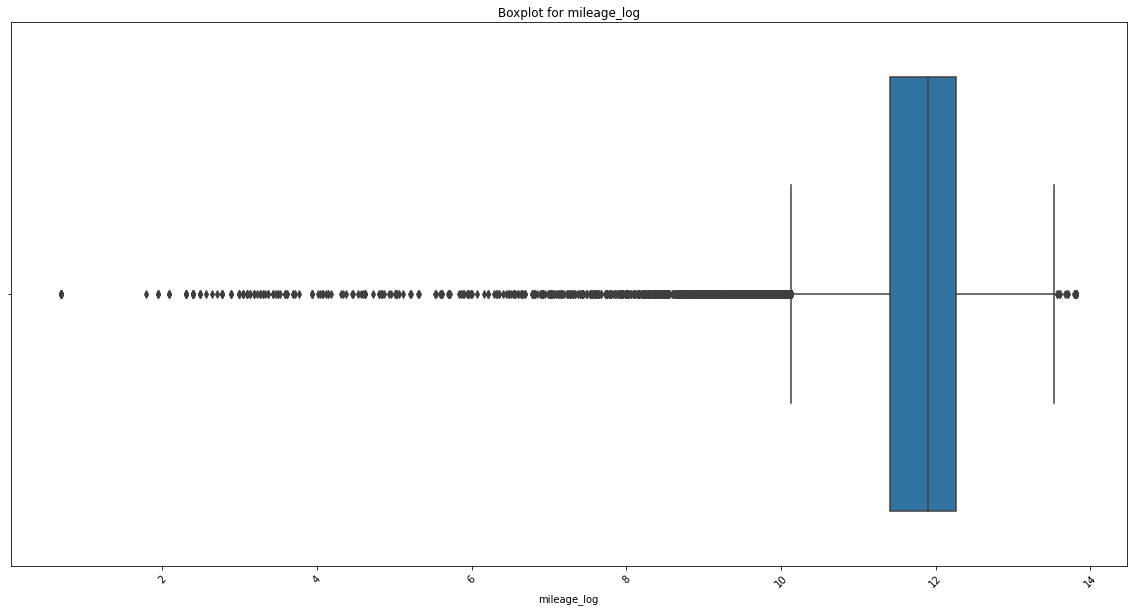

In [101]:
clear_boxplot('mileage_log')

Taking the log value turned the left-hand tail into a right-hand tail. Will keep the log value for now, might be better suited for the model.

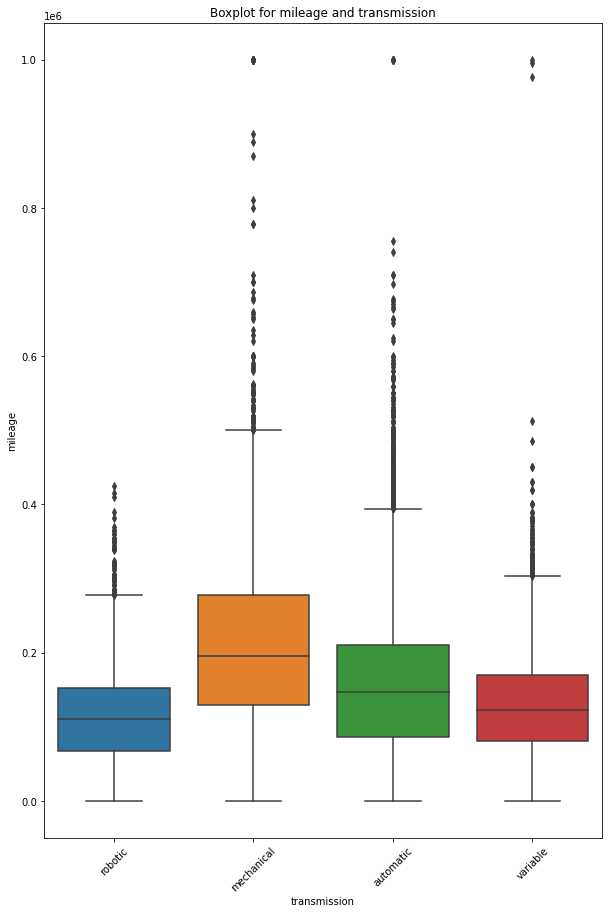

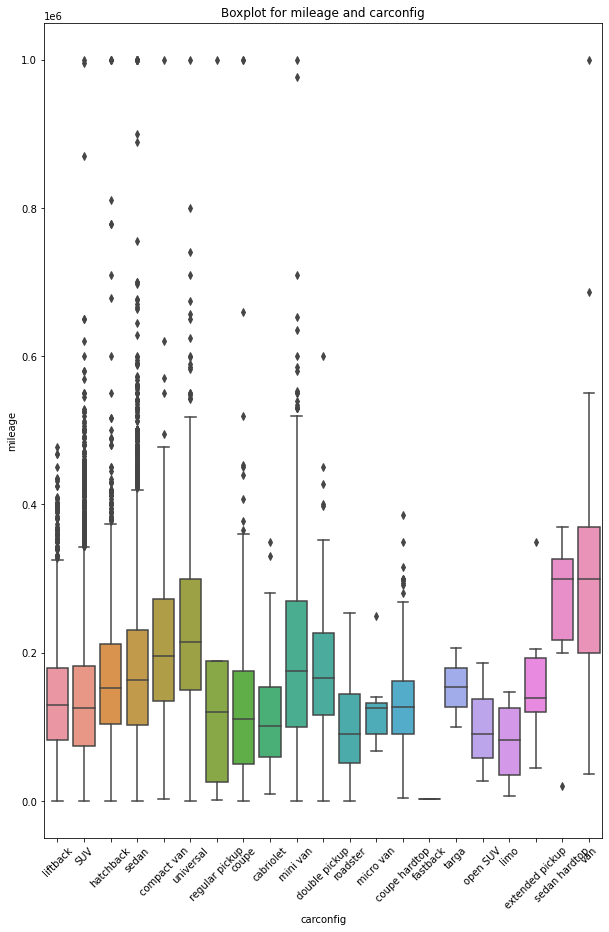

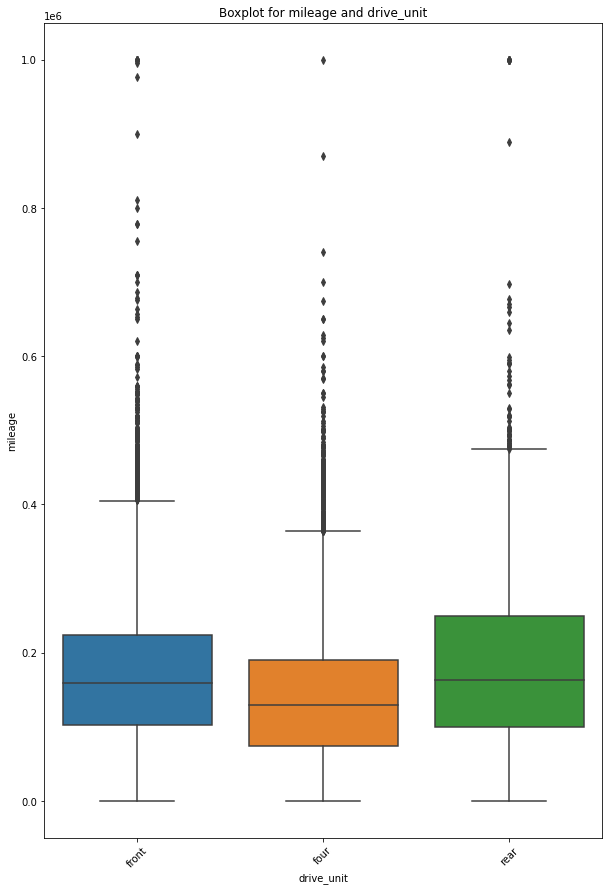

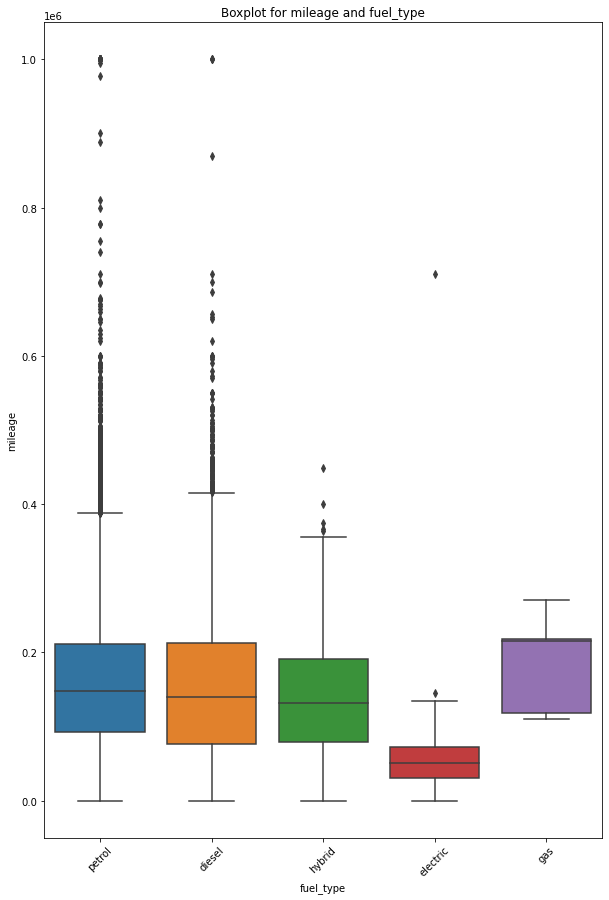

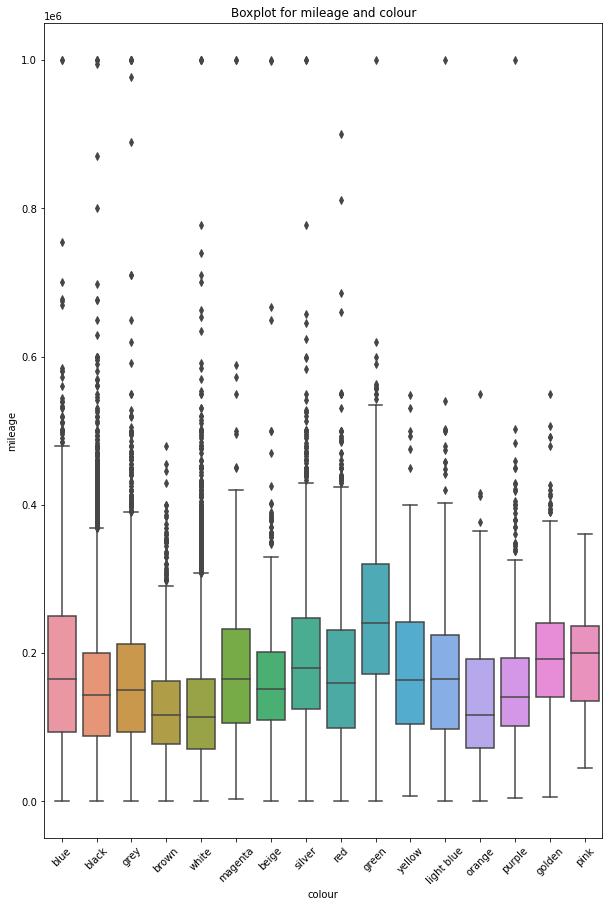

In [102]:
for column in ['transmission', 'carconfig',
               'drive_unit', 'fuel_type',
               'colour']:
    boxplot_numerical(column, 'mileage')

Text(27.0, 0.5, 'Price')

<Figure size 1080x360 with 0 Axes>

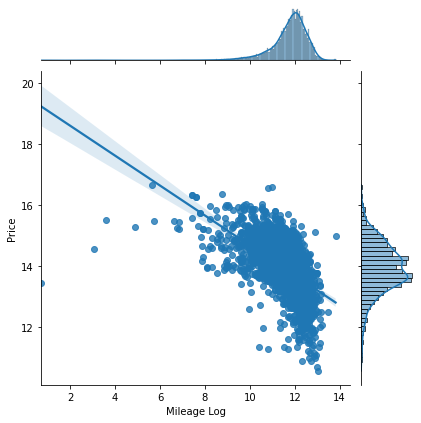

In [103]:
plt.figure(figsize=(15, 5))
sns.jointplot(x='mileage_log',
              y='price',
              data=df,
              kind='reg')
plt.xlabel('Mileage Log')
plt.ylabel('Price')

The general trend is that the older groups tend to have larger milage. The only exception is the fuel type - cars with gas as their fuel have a larger mileage.
As the mileage increases, the price decreases.

## model date

In [104]:
def get_model_date(model_date):
    pattern = '\d\d\d\d'
    numbers = re.findall(pattern, str(model_date))
    model_date = int(numbers[0])
    return model_date

In [105]:
df.model_date = df.model_date.apply(get_model_date)

C:\Users\d\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

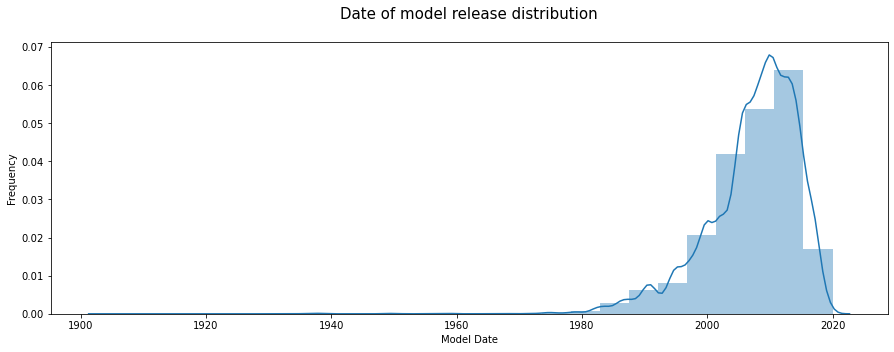

In [106]:
plt.figure(figsize=(15, 5))
sns.distplot(df.model_date.values, bins=25)
plt.title('Date of model release distribution\n', fontsize=15)
plt.xlabel('Model Date')
plt.ylabel('Frequency')

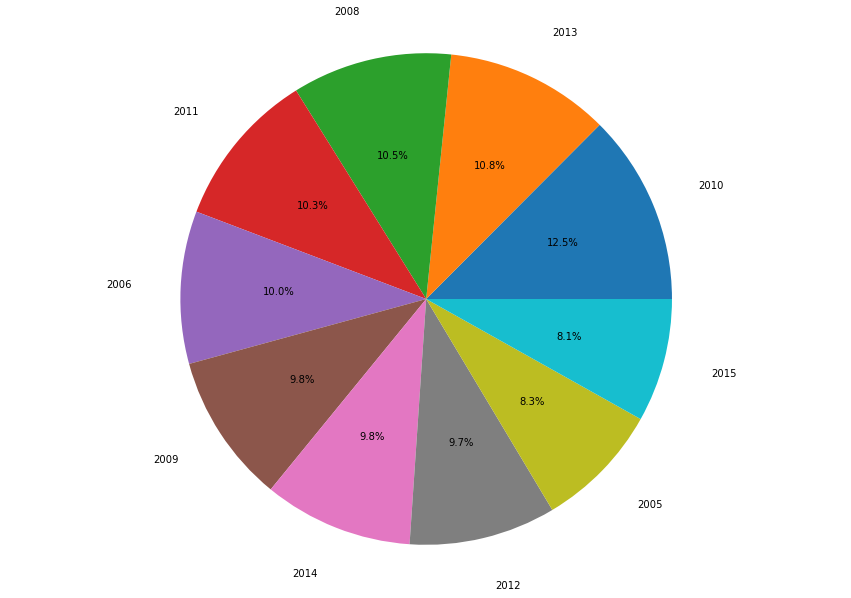

In [107]:
pie('model_date')

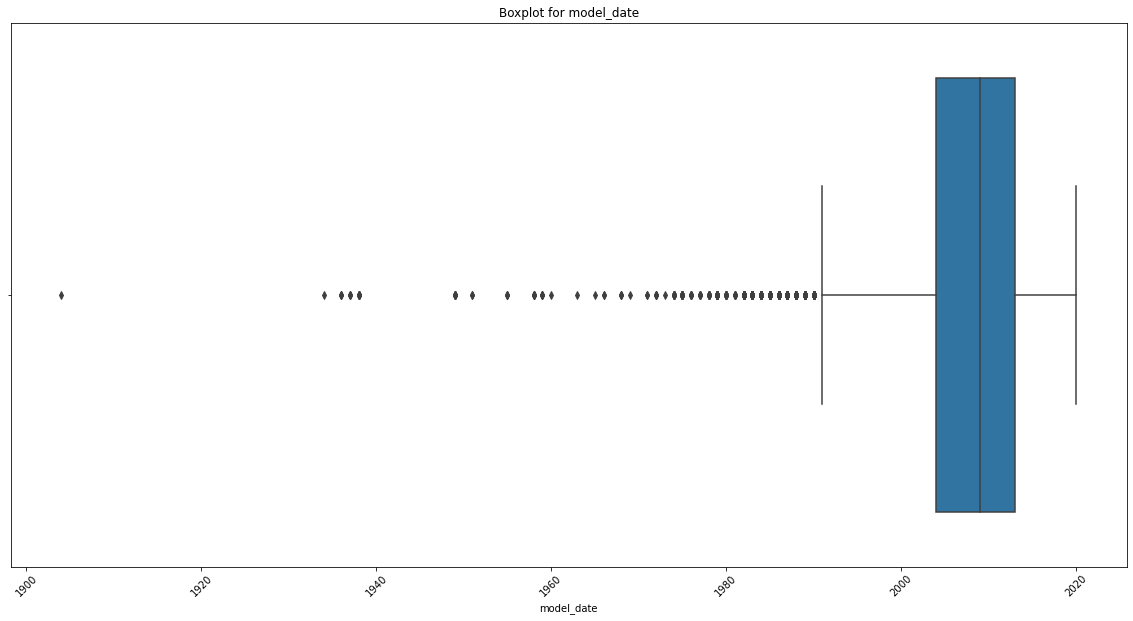

In [108]:
clear_boxplot('model_date')

Text(27.0, 0.5, 'Production Date')

<Figure size 1080x360 with 0 Axes>

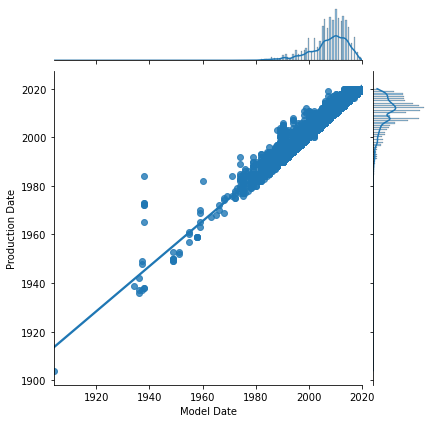

In [109]:
plt.figure(figsize=(15, 5))
sns.jointplot(x='model_date',
              y='production_date',
              data=df,
              kind='reg')
plt.xlabel('Model Date')
plt.ylabel('Production Date')

Newer cars tend to have similar date of production and release, while older cars tend to have a larger difference between the two.

# New features
While mileage makes up a large chunk of what affects the price, a new feature can be created using it.

In [110]:
df.loc[
    df['age'] != 0, 'mileage_per_year'
] = df.loc[
    df['age'] != 0, 'mileage'] / df.loc[df['age'] != 0, 'age']

In [111]:
df.loc[
    df['age'] == 0, 'mileage_per_year'
] = df.loc[df['age'] == 0, 'mileage']

C:\Users\d\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

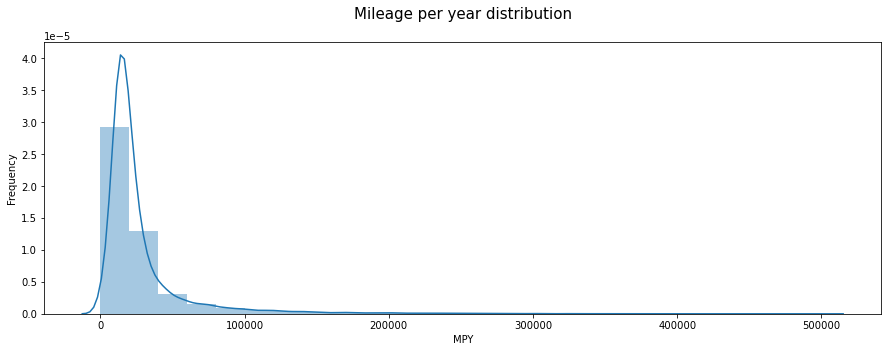

In [112]:
plt.figure(figsize=(15, 5))
sns.distplot(df.mileage_per_year.values, bins=25)
plt.title('Mileage per year distribution\n', fontsize=15)
plt.xlabel('MPY')
plt.ylabel('Frequency')

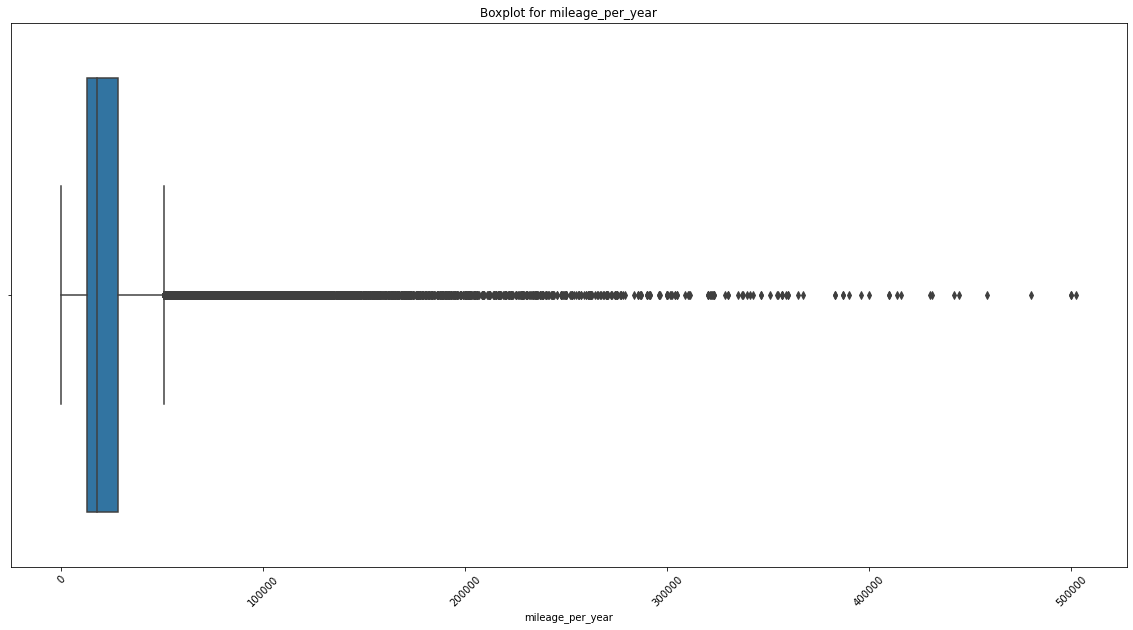

In [113]:
clear_boxplot('mileage_per_year')

# Encoding, correlations and splitting the data

In [114]:
df.loc[df.test == 0].describe()

,power,mileage,model_date,number_of_doors,production_date,sell_id,vendor,owners,licence,wheel,test,price,production_log,power_log,mileage_log
count,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,0.0,2856.000000,2856.000000,2856.000000,2856.000000,2856.0,2856.000000,2856.000000,2856.000000,2856.000000
mean,170.226541,131233.733543,2009.798669,4.617647,2011.985294,NaN,0.544118,1.092087,0.903711,0.066176,0.0,13.937015,7.606871,5.062467,11.509556
std,70.236614,84816.601432,7.195865,0.575772,7.063023,NaN,0.498137,0.767278,0.295038,0.248634,0.0,0.822442,0.003532,0.380180,0.922706
min,51.000000,1.000000,1936.000000,2.000000,1938.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.0,10.582276,7.569412,3.931826,0.693147
25%,117.000000,72558.000000,2008.000000,4.000000,2010.000000,NaN,0.000000,0.000000,1.000000,0.000000,0.0,13.448331,7.605890,4.762174,11.192155
50%,150.000000,122000.000000,2011.000000,5.000000,2013.000000,NaN,1.000000,1.000000,1.000000,0.000000,0.0,13.927904,7.607381,5.010635,11.711785
75%,204.000000,174000.000000,2014.000000,5.000000,2016.000000,NaN,1.000000,2.000000,1.000000,0.000000,0.0,14.493892,7.608871,5.318120,12.066816
max,625.000000,999000.000000,2020.000000,5.000000,2020.000000,NaN,1.000000,2.000000,1.000000,1.000000,0.0,16.651702,7.610853,6.437752,13.814511


In [115]:
for column in ['carconfig', 'brand', 'colour',
               'fuel_type', 'model_name',
               'transmission', 'drive_unit']:
    df[column] = df[column].astype('category').cat.codes

In [116]:
category = ['carconfig', 'brand', 'colour',
            'fuel_type', 'model_name',
            'transmission', 'owners',
            'drive_unit']
binary = ['vendor', 'licence',
          'wheel']
numerical = ['power', 'mileage', 'mileage_per_year',
             'model_date', 'number_of_doors',
             'production_date', 'age', 'engine_displacement']
numerical_log = ['power_log', 'mileage_log', 'mileage_per_year',
                 'model_date', 'number_of_doors',
                 'production_log', 'age', 'engine_displacement']
all_numerical = ['power', 'mileage', 'mileage_per_year',
                 'model_date', 'number_of_doors',
                 'production_date', 'age',
                 'power_log', 'mileage_log',
                 'production_log', 'engine_displacement']
target = 'price'

In [117]:
df[all_numerical] = StandardScaler().fit_transform(df[all_numerical])

Certain graphs did not work before standard scaler, so they are presented here:

Text(27.0, 0.5, 'Price')

<Figure size 1080x360 with 0 Axes>

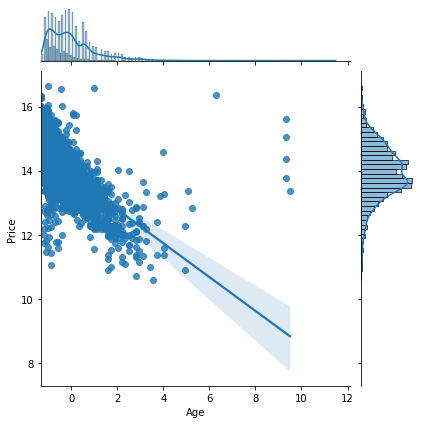

In [118]:
plt.figure(figsize=(15, 5))
sns.jointplot(x='age',
              y='price',
              data=df,
              kind='reg')
plt.xlabel('Age')
plt.ylabel('Price')

Text(27.0, 0.5, 'Price')

<Figure size 1080x360 with 0 Axes>

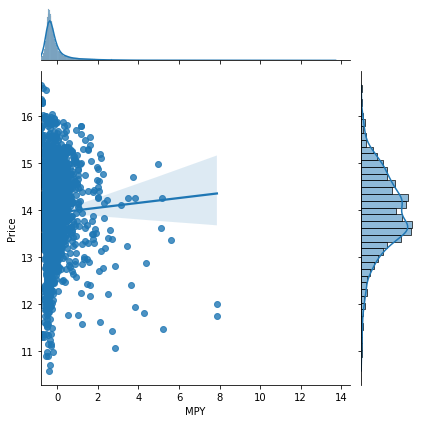

In [119]:
plt.figure(figsize=(15, 5))
sns.jointplot(x='mileage_per_year',
              y='price',
              data=df,
              kind='reg')
plt.xlabel('MPY')
plt.ylabel('Price')

Text(27.0, 0.5, 'Mileage Log')

<Figure size 1080x360 with 0 Axes>

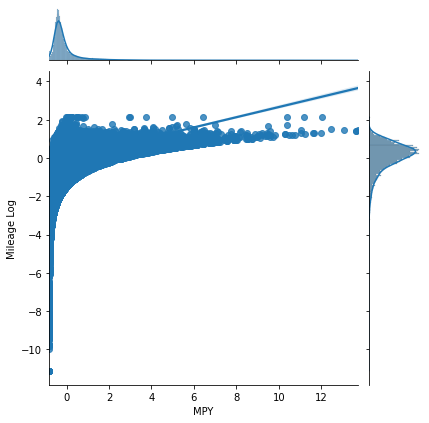

In [120]:
plt.figure(figsize=(15, 5))
sns.jointplot(x='mileage_per_year',
              y='mileage_log',
              data=df,
              kind='reg')
plt.xlabel('MPY')
plt.ylabel('Mileage Log')

In [121]:
df.head()

,carconfig,brand,colour,engine_displacement,power,fuel_type,mileage,model_date,model_name,number_of_doors,...,age,licence,drive_unit,wheel,test,price,production_log,power_log,mileage_log,mileage_per_year
0,9,8,2,-1.242613,-0.930675,4,-0.857626,0.769139,47,0.771299,...,-0.395967,1.0,1,0,1,NaN,0.638425,-1.143725,-0.494850,-0.454646
1,9,8,1,-0.823203,-0.873806,4,-0.992143,1.307182,47,0.771299,...,-0.852760,1.0,1,0,1,NaN,1.059414,-1.033595,-0.696859,-0.227362
2,9,8,6,-0.613499,-0.396113,4,-0.717472,0.769139,69,0.771299,...,-0.395967,1.0,1,0,1,NaN,0.638425,-0.267984,-0.320169,-0.387125
3,9,8,3,-0.823203,-0.873806,4,-0.647395,0.769139,47,0.771299,...,-0.395967,1.0,1,0,1,NaN,0.638425,-1.033595,-0.243007,-0.353365
4,9,8,14,-0.613499,-0.396113,4,-1.012435,0.096585,47,0.771299,...,-0.091438,1.0,1,0,1,NaN,0.357417,-0.267984,-0.731178,-0.599806


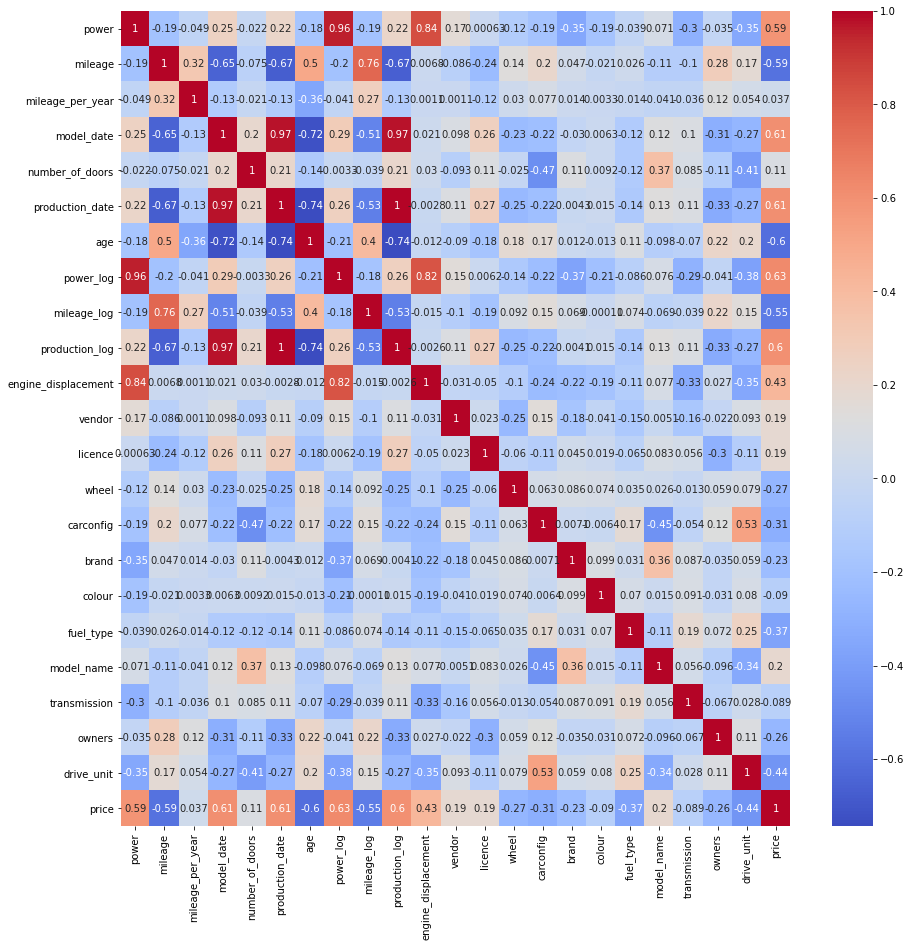

In [122]:
plt.figure(figsize=(15, 15))
sns.heatmap(df[all_numerical+binary+category+['price']].corr(),
            cmap='coolwarm',
            annot=True)

All the logged values have a strong correlation with their original ones. The only strong correlation is betwen engine power and engine displacement, so displacement will be dropped. 

In [123]:
numerical_log.remove('engine_displacement')

In [124]:
# overview of train data
df.loc[df.test == 0].describe()

,carconfig,brand,colour,engine_displacement,power,fuel_type,mileage,model_date,model_name,number_of_doors,...,age,licence,drive_unit,wheel,test,price,production_log,power_log,mileage_log,mileage_per_year
count,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,...,2856.000000,2856.000000,2856.000000,2856.000000,2856.0,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000
mean,6.781162,6.470588,7.230742,-0.218357,-0.188811,3.173669,-0.284660,0.338526,49.285014,0.221602,...,-0.169298,0.903711,0.621499,0.066176,0.0,13.937015,0.353594,-0.176635,-0.194703,-0.153481
std,6.976423,3.502890,5.303831,0.820583,0.798847,1.606670,0.849097,0.967921,20.064642,0.827769,...,0.941619,0.295038,0.551971,0.248634,0.0,0.822442,0.999071,0.900029,0.930219,0.584483
min,0.000000,0.000000,0.000000,-1.766874,-1.544852,0.000000,-1.598428,-9.588187,0.000000,-3.541708,...,-1.309554,0.000000,0.000000,0.000000,0.0,10.582276,-10.241152,-2.853292,-11.099191,-0.811536
25%,0.000000,4.000000,2.000000,-0.823203,-0.794191,4.000000,-0.872061,0.096585,37.000000,-0.666370,...,-0.852760,1.000000,0.000000,0.000000,0.0,13.448331,0.076130,-0.887543,-0.514689,-0.435020
50%,5.000000,7.000000,6.000000,-0.403794,-0.418860,4.000000,-0.377098,0.500117,48.000000,0.771299,...,-0.243702,1.000000,1.000000,0.000000,0.0,13.927904,0.497956,-0.299340,0.009172,-0.294565
75%,16.000000,9.000000,13.000000,0.120468,0.195317,4.000000,0.143472,0.903650,62.000000,0.771299,...,0.213091,1.000000,1.000000,0.000000,0.0,14.493892,0.919154,0.428593,0.367095,-0.064549
max,20.000000,11.000000,15.000000,3.475742,4.983623,4.000000,8.402531,1.710714,85.000000,0.771299,...,9.501227,1.000000,2.000000,1.000000,0.0,16.651702,1.479777,3.079185,2.129021,7.869683


In [125]:
X1 = df.loc[df.test == 0, category+binary+numerical]
X2 = df.loc[df.test == 0, category+binary+numerical_log]
Y = df.loc[df.test == 0, 'price']

In [126]:
# X2 shows better results
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y,
                                                    test_size=0.2,
                                                    random_state=27)

In [127]:
def metrics(model,
            X_train=X_train,
            X_test=X_test,
            Y_train=Y_train,
            Y_test=Y_test):
    # the function takes in the model and returns
    # MAPE for logged and non-logged price
    # for train and test values
    y_pred = model.predict(X_test)
    print('Mean percentage error of logged price:',
          mean_absolute_percentage_error(Y_test, y_pred)*100)
    print('Mean percentage error of full price:',
          mean_absolute_percentage_error(np.exp(Y_test),
                                         np.exp(y_pred))*100)
    y_pred_train = model.predict(X_train)
    print('Comparing predictions on training values of logged price:',
          mean_absolute_percentage_error(Y_train, y_pred_train)*100)
    print('Comparing predictions on training values of full price:',
          mean_absolute_percentage_error(np.exp(Y_train),
                                         np.exp(y_pred_train))*100)

# Naive Linear Regression

In [128]:
naive_reg = LinearRegression()
naive_reg.fit(X_train, Y_train)
naive_reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [129]:
metrics(naive_reg)

Mean percentage error of logged price: 1.7880438917387296
Mean percentage error of full price: 27.257977678969425
Comparing predictions on training values of logged price: 1.9383321807086167
Comparing predictions on training values of full price: 29.194623533854084


The model shows a fairly bad result and hardly can be improved by adding hyperparameters. As an advantage, the models results are fairly consistant - the MAPE is similar for train and test values.

# Naive Random Forest Regressor

In [130]:
rfr_naive = RandomForestRegressor(random_state=27)
rfr_naive.fit(X_train, Y_train)
# getting the parameters of the model to compare them with the future ones
rfr_naive.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 27,
 'verbose': 0,
 'warm_start': False}

In [131]:
metrics(rfr_naive)

Mean percentage error of logged price: 1.0930043809370575
Mean percentage error of full price: 15.61899776010348
Comparing predictions on training values of logged price: 0.4129579958123848
Comparing predictions on training values of full price: 5.617422118164344


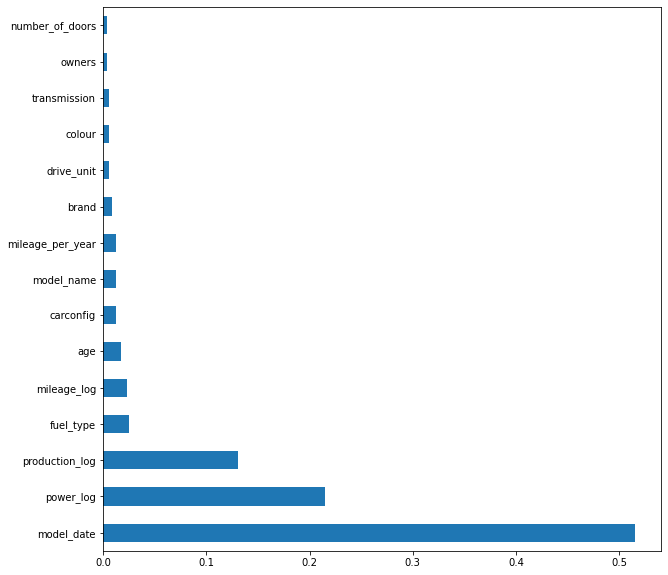

In [132]:
plt.rcParams['figure.figsize'] = (10, 10)
feat_importances = pd.Series(rfr_naive.feature_importances_, index=X2.columns)
feat_importances.nlargest(15).plot(kind='barh')

While the MAPE result is fairly good, this model is severely underfitted. Discarding.

# Random Forest Regressor with hyperparameters

In [133]:
rfr_hyp = RandomForestRegressor(random_state=27)
params = {
    'max_depth': [5],
    'n_estimators': [300, 400],
    'max_features': [17],
    'ccp_alpha': [0]
}

rfr_search = GridSearchCV(rfr_hyp,
                          params,
                          scoring='neg_mean_absolute_error',
                          refit=True,
                          cv=5,
                          verbose=False)

rfr_search = rfr_search.fit(X_train, Y_train)
best_params_forest = rfr_search.best_estimator_.get_params()

In [135]:
best_params_forest

{'bootstrap': True,
 'ccp_alpha': 0,
 'criterion': 'mse',
 'max_depth': 5,
 'max_features': 17,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 27,
 'verbose': 0,
 'warm_start': False}

In [136]:
rfr_hyp = RandomForestRegressor(**best_params_forest)
rfr_hyp.fit(X_train, Y_train)
metrics(rfr_hyp)

Mean percentage error of logged price: 1.4664860908369648
Mean percentage error of full price: 21.28098452276529
Comparing predictions on training values of logged price: 1.4031929338314204
Comparing predictions on training values of full price: 19.878112993240865


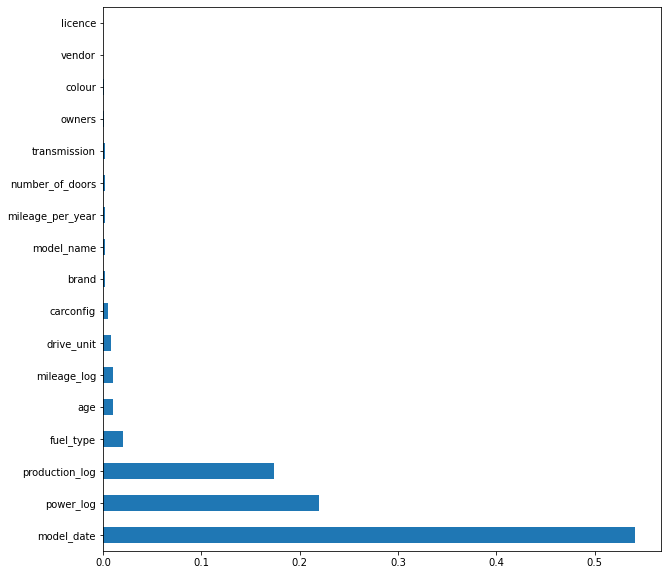

In [137]:
plt.rcParams['figure.figsize'] = (10, 10)
feat_importances = pd.Series(rfr_hyp.feature_importances_, index=X2.columns)
feat_importances.nlargest(17).plot(kind='barh')

This model shows much better results than naive version and linear regression. The difference between MAPE for train and test is fairly small, so the model is fairly decent.

# Catboost
Using Catboost from the Baseline of the project

In [138]:
catboost = CatBoostRegressor(iterations=5000,
                             random_seed=27,
                             eval_metric='MAPE',
                             custom_metric=['R2', 'MAE'],
                             silent=True,
                             learning_rate=0.003
                            )
catboost.fit(X_train, Y_train)
catboost.get_params()

{'iterations': 5000,
 'learning_rate': 0.003,
 'loss_function': 'RMSE',
 'random_seed': 27,
 'silent': True,
 'custom_metric': ['R2', 'MAE'],
 'eval_metric': 'MAPE'}

In [139]:
metrics(catboost)

Mean percentage error of logged price: 1.0206528057647908
Mean percentage error of full price: 14.829079236582876
Comparing predictions on training values of logged price: 0.8482746647073188
Comparing predictions on training values of full price: 11.818901513979675


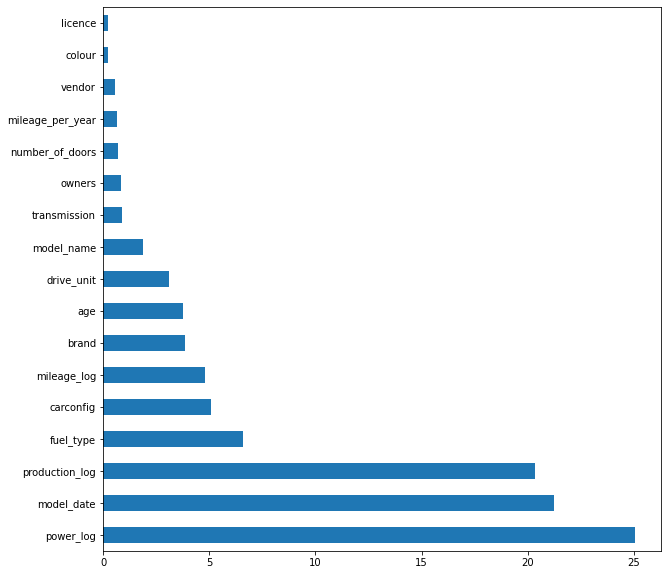

In [140]:
plt.rcParams['figure.figsize'] = (10, 10)
feat_importances = pd.Series(catboost.feature_importances_, index=X2.columns)
feat_importances.nlargest(17).plot(kind='barh')

After fiddling with the learning rate, the difference between train and test MAPE was reduced. 

# Gradient Boosting Regressor

In [141]:
gb_naive = GradientBoostingRegressor(random_state=27)
gb_naive.fit(X_train, Y_train)
catboost.get_params()

{'iterations': 5000,
 'learning_rate': 0.003,
 'loss_function': 'RMSE',
 'random_seed': 27,
 'silent': True,
 'custom_metric': ['R2', 'MAE'],
 'eval_metric': 'MAPE'}

In [142]:
metrics(gb_naive)

Mean percentage error of logged price: 1.1205045587223275
Mean percentage error of full price: 16.471029721198423
Comparing predictions on training values of logged price: 0.9813160789245826
Comparing predictions on training values of full price: 13.731382224628003


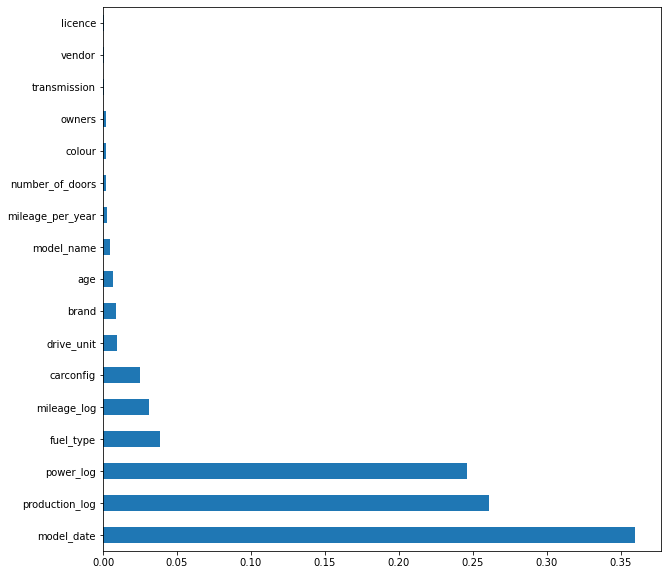

In [143]:
plt.rcParams['figure.figsize'] = (10, 10)
feat_importances = pd.Series(gb_naive.feature_importances_, index=X2.columns)
feat_importances.nlargest(17).plot(kind='barh')

## adding hyperparameters

In [144]:
gb_hyp = GradientBoostingRegressor(random_state=27)
params = {'n_estimators': [400],
          'max_features': ['sqrt'],
          'max_depth': [5],
          'min_samples_split': [2],
          'min_samples_leaf': [4],
          'learning_rate':[0.01]}

gb_search = GridSearchCV(gb_hyp,
                         params,
                         scoring='neg_mean_absolute_error',
                         refit=True,
                         cv=3,
                         verbose=False)

gb_search = gb_search.fit(X_train, Y_train)
best_params = gb_search.best_estimator_.get_params()

In [145]:
best_params

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'ls',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'n_iter_no_change': None,
 'random_state': 27,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [146]:
gb_hyp = GradientBoostingRegressor(**best_params)
gb_hyp.fit(X_train, Y_train)
metrics(gb_hyp)

Mean percentage error of logged price: 1.1115395752088735
Mean percentage error of full price: 16.152955201692983
Comparing predictions on training values of logged price: 0.9442976194552829
Comparing predictions on training values of full price: 13.205767669801153


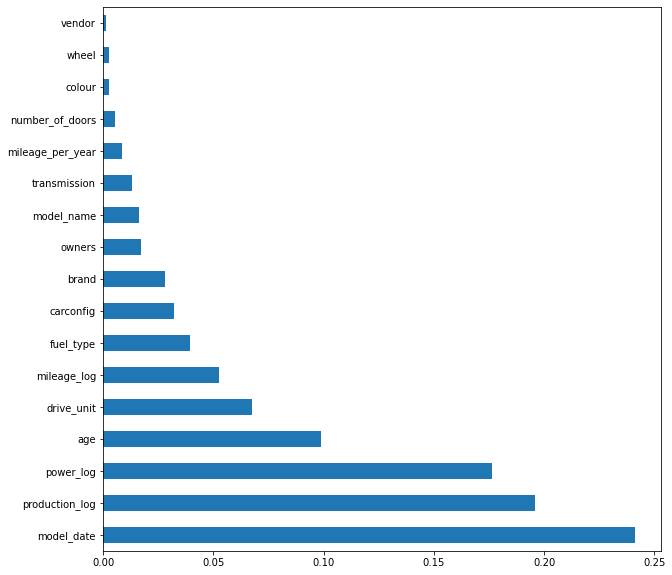

In [147]:
plt.rcParams['figure.figsize'] = (10, 10)
feat_importances = pd.Series(gb_hyp.feature_importances_, index=X2.columns)
feat_importances.nlargest(17).plot(kind='barh')

# XGB Regressor

In [148]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.5,
                          learning_rate=0.1, max_depth=12, alpha=1,
                          n_estimators=1000)
xg_reg.fit(X_train, Y_train)

XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=12,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [149]:
metrics(xg_reg)

Mean percentage error of logged price: 0.9737927228856746
Mean percentage error of full price: 14.072144695967804
Comparing predictions on training values of logged price: 0.38267700149592015
Comparing predictions on training values of full price: 5.301989375847402


# Adaboost

In [150]:
ada_boost = AdaBoostRegressor(n_estimators=50,
                              learning_rate=1.0,
                              loss='linear',
                              random_state=27)
ada_boost.fit(X_train, Y_train)

AdaBoostRegressor(random_state=27)

In [151]:
metrics(ada_boost)

Mean percentage error of logged price: 1.8240068990330962
Mean percentage error of full price: 26.938716908010296
Comparing predictions on training values of logged price: 1.812250039362098
Comparing predictions on training values of full price: 25.50555258285254


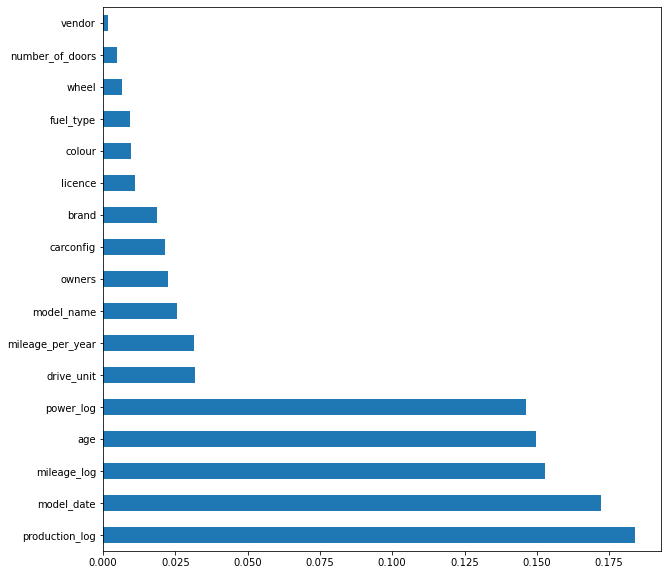

In [152]:
plt.rcParams['figure.figsize'] = (10, 10)
feat_importances = pd.Series(ada_boost.feature_importances_, index=X2.columns)
feat_importances.nlargest(17).plot(kind='barh')

# Bagging

## Gradient Boosting Regressor

In [153]:
bag_gb = BaggingRegressor(gb_naive, n_estimators=3, random_state=27)

In [154]:
bag_gb.fit(X_train, Y_train)
metrics(bag_gb)

Mean percentage error of logged price: 1.1117782366836888
Mean percentage error of full price: 16.238607138390275
Comparing predictions on training values of logged price: 1.016941965560619
Comparing predictions on training values of full price: 14.28240271905305


## Catboost

In [170]:
catboost_stack = CatBoostRegressor(iterations=5000,
                                   random_seed=27,
                                   eval_metric='MAPE',
                                   silent=True,
                                   learning_rate=0.003)
catboost_bag = BaggingRegressor(catboost_stack,
                                n_estimators=3,
                                random_state=27)

In [171]:
catboost_bag.fit(X_train, Y_train)
metrics(catboost_bag)

Mean percentage error of logged price: 1.0288909476108326
Mean percentage error of full price: 14.881081729132276
Comparing predictions on training values of logged price: 0.8954608053145688
Comparing predictions on training values of full price: 12.553230074266706


# Stacking
Using stacking to improve the results

In [172]:
estimators = [('adr', RandomForestRegressor(**best_params_forest)),
              ('bagging', bag_gb)]

In [173]:
stacking_model = StackingRegressor(estimators,
                                   final_estimator=catboost_bag)

In [174]:
stacking_model.fit(X_train, Y_train)
metrics(stacking_model)

Mean percentage error of logged price: 1.1525183412157585
Mean percentage error of full price: 16.76731341391068
Comparing predictions on training values of logged price: 1.0701753679676322
Comparing predictions on training values of full price: 15.096626950398893


In [175]:
model = bag_gb

In [176]:
X_sub = df.loc[df.test == 1, category+binary+numerical_log].values

In [177]:
y_sub = model.predict(X_sub)

In [178]:
df_sub = pd.DataFrame()
df_sub['sell_id'] = df.loc[df.test == 1, 'sell_id']
df_sub['sell_id'] = df_sub.sell_id.apply(lambda x: int(x))
df_sub['price'] = np.exp(y_sub)

In [179]:
df_sub.to_csv('submission.csv', index=False)

In [180]:
df_sub

,sell_id,price
0,1100575026,7.892067e+05
1,1100549428,1.004558e+06
2,1100658222,1.239479e+06
3,1100937408,8.673682e+05
4,1101037972,8.434715e+05
...,...,...
34681,1101369263,9.252105e+05
34682,1101369581,3.204651e+06
34683,1101364889,2.610381e+05
34684,1101362518,1.698651e+06
